# Revised Version
- Added a simple calculation example for NMF like in the clustering chapter
- Documentation for how many NMF features we used

We added (Revised) for our **newly added explanations and justifications** - so you can find them more easily.

### Kaggle

Group 1

Jenewein Matthias - Jenewein Matthias

Kalarickal Dominic - Kalarickal Dominic

Leander Leirissa - Bitterzoet

Timmer Lars - laltir

# 0. Loading packages

If not all libraries are installed, uncomment the cell below

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement listdir (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for listdir


In [2]:
import warnings 

warnings.filterwarnings('ignore')

import functions as f

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import os
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)

# 1. Loading labeled data labels

In [3]:
labels = pd.read_csv('Datasets/labels_new.csv')

In [4]:
labels.head()

,filename,genre
0,m00248.wav,metal
1,m00230.wav,country
2,m00637.wav,hiphop
3,m00627.wav,metal
4,m00138.wav,reggae


# 2. Feature Engineering

In [5]:
labeled_files = os.listdir('Datasets/labeled')
unlabeled_files = os.listdir('Datasets/unlabeled')

print("Labeled files:", labeled_files)
print("Unlabeled files:", unlabeled_files)

Labeled files: ['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav', 'm00102.wav', 'm00112.wav', 'm00138.wav', 'm00192.wav', 'm00206.wav', 'm00230.wav', 'm00236.wav', 'm00248.wav', 'm00253.wav', 'm00298.wav', 'm00313.wav', 'm00338.wav', 'm00339.wav', 'm00351.wav', 'm00400.wav', 'm00421.wav', 'm00429.wav', 'm00435.wav', 'm00454.wav', 'm00477.wav', 'm00501.wav', 'm00503.wav', 'm00513.wav', 'm00553.wav', 'm00606.wav', 'm00623.wav', 'm00627.wav', 'm00629.wav', 'm00633.wav', 'm00637.wav', 'm00658.wav', 'm00671.wav', 'm00676.wav', 'm00677.wav', 'm00678.wav', 'm00716.wav', 'm00762.wav', 'm00772.wav', 'm00773.wav', 'm00801.wav', 'm00821.wav', 'm00850.wav', 'm00867.wav', 'm00895.wav', 'm00996.wav']
Unlabeled files: ['m00003.wav', 'm00012.wav', 'm00013.wav', 'm00043.wav', 'm00044.wav', 'm00055.wav', 'm00061.wav', 'm00063.wav', 'm00069.wav', 'm00074.wav', 'm00107.wav', 'm00114.wav', 'm00127.wav', 'm00137.wav', 'm00139.wav', 'm00148.wav', 'm00149.wav', 'm00156.wav', 'm00183.wav', 

### Load and Process Features from Audio Files  
This cell handles the loading and processing of features extracted from labeled and unlabeled audio files:  
- An instance of the `DataLoader` class is initialized.  
- The `featureDataFrame` method is called twice to generate DataFrames containing features for labeled and unlabeled files:  
  - Labeled features are extracted from the `labeled_files` directory and saved in `labeled_features_df`.  
  - Unlabeled features are extracted from the `unlabeled_files` directory and saved in `unlabeled_features_df`.  
- The `labeled_features_df` DataFrame is merged with the `labels` DataFrame on the `filename` column to associate labels with the features.  

Finally, both the labeled and unlabeled DataFrames are displayed to preview their structure and contents.  


In [6]:
dl = f.DataLoader()

labeled_features_df = dl.featureDataFrame(labeled_files, 'Datasets/labeled')
unlabeled_features_df = dl.featureDataFrame(unlabeled_files, 'Datasets/unlabeled')

labeled_features_df = labeled_features_df.merge(labels, on='filename')

print("Labeled Features DataFrame")
display(labeled_features_df.head())

print("\nUnlabeled Features DataFrame")
display(unlabeled_features_df.head())

Labeled Features DataFrame


,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean,filename,genre
0,2549.269757,2485.524548,21.878422,0.115834,0.184340,5583.144894,-91.983772,87.640099,-2.066796,34.278149,-18.124571,19.345659,-14.665754,17.112078,-15.336202,17.028185,-13.534051,11.835089,-9.814680,0.432902,0.321649,0.366385,0.344440,0.321556,0.335174,0.332990,0.352914,0.269635,0.244928,0.239062,0.318006,123.046875,16.843315,15.728975,19.023666,19.995101,19.370804,18.633169,43.553926,-0.014465,0.021814,-0.005926,0.013425,0.005919,0.002178,0.009791,m00096.wav,disco
1,1811.410394,2019.300257,22.125983,0.072150,0.123665,3854.851374,-169.153351,110.459999,-8.576200,43.884247,0.274970,26.637419,-14.368152,13.034432,-11.149249,8.130109,-7.692966,10.910651,-8.175924,0.412044,0.333314,0.389579,0.370359,0.308951,0.386791,0.288708,0.329985,0.243529,0.297682,0.422818,0.401892,135.999178,19.964829,17.050832,21.109923,19.301231,20.553355,18.597363,38.304349,-0.055290,0.124234,0.011880,-0.021722,0.016998,0.003116,0.004313,m00039.wav,reggae
2,1451.862124,1920.270843,24.220021,0.051224,0.050480,3047.431199,-298.756134,112.076279,6.488818,28.389170,-6.770987,16.645588,-11.807552,12.744363,-8.340971,13.893223,-4.237727,2.317613,-4.329582,0.117655,0.133911,0.220483,0.188410,0.168177,0.193637,0.130628,0.203946,0.364396,0.287583,0.224478,0.185700,129.199219,19.667917,20.515668,26.072390,25.745788,23.396068,19.541724,34.600593,0.008745,0.028968,-0.004044,0.020831,-0.043709,-0.007959,0.001261,m00002.wav,jazz
3,2624.814629,2709.897108,19.451050,0.120217,0.142927,5605.777240,-69.630653,83.072273,-16.599928,0.118371,7.420608,0.770008,1.337478,4.695799,-1.416824,3.319435,-2.878265,-8.202150,-5.767511,0.286717,0.369671,0.274070,0.371769,0.311118,0.487251,0.551675,0.375336,0.508559,0.282717,0.376277,0.277690,129.199219,29.752017,16.141935,18.926104,19.113687,19.466281,17.548978,15.208348,-0.057095,-0.026923,-0.016473,-0.016696,-0.004114,0.005338,0.038256,m00072.wav,disco
4,3110.898196,2992.010638,17.236284,0.152857,0.198322,6744.988603,-18.845390,71.325661,-3.766896,-1.408727,0.705463,-1.058955,-1.054825,-0.247421,0.625723,0.427043,-1.503742,-1.076155,2.419871,0.412797,0.537429,0.301002,0.379488,0.269635,0.380168,0.264904,0.303025,0.473597,0.332073,0.445475,0.293710,95.703125,17.233862,14.865518,18.241217,18.563320,19.586907,17.007064,15.156099,-0.130213,-0.030896,-0.059284,-0.000773,0.012796,-0.016378,0.078496,m00041.wav,pop



Unlabeled Features DataFrame


,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean,filename
0,2384.634958,2072.759900,19.720750,0.126073,0.100411,4584.132502,-120.147491,91.317215,-38.845890,75.008400,-3.813260,22.665588,-8.119441,23.654900,-14.630774,13.370975,-9.403306,13.706296,-9.315235,0.420561,0.352720,0.438729,0.588504,0.809106,0.540158,0.336136,0.368313,0.400302,0.380119,0.425498,0.526869,135.999178,18.871521,14.355007,15.568276,14.744588,16.072624,19.146556,39.286679,0.034065,-0.045781,0.069088,0.054560,0.021101,-0.025107,0.008830,m00043.wav
1,790.507005,900.409298,20.252849,0.052088,0.018833,1159.412273,-437.604401,170.931534,7.419581,-3.083473,0.789382,-11.128749,-12.522781,-6.907836,-5.858702,-8.461237,-8.481487,-8.339388,-7.378574,0.121688,0.103558,0.303260,0.355438,0.127611,0.195966,0.140674,0.182006,0.287204,0.227969,0.408830,0.159130,143.554688,14.756063,17.163709,22.318450,24.297561,24.119580,21.639522,17.475062,-0.156577,0.112052,0.046222,-0.127561,-0.020312,-0.002277,0.000153,m00044.wav
2,2908.300131,2286.252592,20.044021,0.178108,0.217475,5405.816551,-1.913298,72.686157,-32.791992,63.605473,-18.556351,25.870161,-13.859100,18.078884,-11.946615,19.672184,-13.954248,18.755697,-11.187991,0.456810,0.557374,0.680656,0.526191,0.406365,0.417328,0.367432,0.334647,0.365308,0.423689,0.311572,0.326612,103.359375,18.524161,13.818721,18.002752,15.368700,15.475696,17.230423,41.887691,0.042327,0.049303,-0.013115,-0.043613,-0.026224,0.003401,0.026373,m00012.wav
3,1952.607933,1865.996047,23.250822,0.123423,0.029083,3779.909832,-287.603699,101.758171,-35.345406,41.280159,-12.727132,17.276148,-13.967989,16.304947,-5.592962,13.654110,-8.788416,-0.053095,-13.757538,0.397867,0.143860,0.112334,0.102700,0.387867,0.583642,0.278688,0.283264,0.192714,0.517787,0.310177,0.168636,184.570312,15.679685,18.681856,21.483555,23.963961,24.473956,23.647332,34.825406,0.026706,0.160484,-0.160780,0.035666,-0.019523,0.015149,0.002211,m00013.wav
4,1900.384454,2420.093629,20.096082,0.066173,0.183958,4189.731819,-111.209496,103.165291,10.905522,34.357307,22.339897,17.869793,6.807890,6.331836,5.493648,0.614028,0.338712,3.830157,2.037151,0.308940,0.418922,0.317481,0.317869,0.495308,0.381528,0.407861,0.321004,0.401797,0.483401,0.334845,0.347140,107.666016,24.412625,17.589618,21.201438,20.587069,21.338418,19.083820,16.459584,0.164663,-0.105102,-0.104005,-0.016431,0.021987,0.044520,0.016659,m00055.wav


## Feature Explanations and Calculations in Machine Learning Audio Analysis

To extract different features from the audio files, we used the `librosa` library. The librosa library offers many different features to explore and is therefore particularly useful for a task like this.

For a reference please, have a look at the function.py or more specifically the "extract_features" method as well as the librosa documentation (https://librosa.org/doc/latest/index.html). All the methods used were taken from there.

### 1. Spectral Centroid

**Explanation:**  
The spectral centroid represents the center of gravity of the spectral energy distribution. A higher spectral centroid is indicative of a brighter sound. It quantifies the frequency where the majority of the signal's energy resides (Sable, 2021).  

**Calculation:**  
Using the `librosa` library, the spectral centroid is computed as the weighted mean of the frequencies, with the magnitudes serving as weights (Librosa, n.d.-a).  

**Mathematical Formula:**  
$$
\text{Spectral Centroid}[t] = \frac{\sum_{k} S[k, t] \cdot \text{freq}[k]}{\sum_{j} S[j, t]}
$$
Where:  
- \(s\): Magnitude spectogram  
- \(freq\): Array of frequency values. 

(Librosa, n.d.-a).

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the spectral centroid differs vastly between genres.

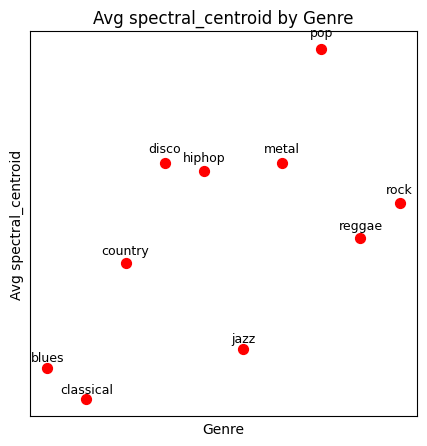

In [7]:
f.visualize_feature('spectral_centroid', labeled_features_df)

### 2. Spectral Bandwidth

**Explanation:**  
Spectral bandwidth represents the spread (distinction between high and low) frequencies. The bandwidth indicates a how noisy or pure a sound sounds (Jakeli, 2023).  

**Calculation:**  
The spectral bandwidth is computed as the weighted standard deviation of frequencies (Music Information Retrieval, n.d.)

**Mathematical Formula:**  
$$
\left( \sum_{k} S[k, t] \cdot \left( \text{freq}[k, t] - \text{centroid}[t] \right)^p \right)^{\frac{1}{p}}
$$ 
Where:  
- \(x(n)\): Magnitude of the frequency bin.  
- \(f(n)\): Frequency value.  

Librosa (n.d.-b)

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the spectral bandwith differs vastly between genres. 

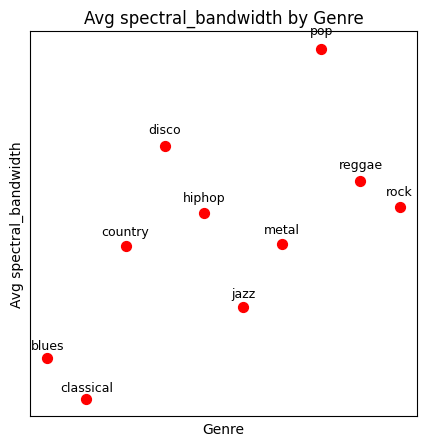

In [8]:
f.visualize_feature('spectral_bandwidth', labeled_features_df)

### 3. Zero Crossing Rate (ZCR)

**Explanation:**  
Zero Crossing Rate measures the rate at which a signal crosses the zero amplitude line (so the prefix changes from positive to negative or vice versa) (OpenAE, n.d.-a). ZCR is an important indicator to capture the smoothness of an audio file (Bäckström et al., 2022).  

**Calculation:**  
The ZCR is computed by summing up the zero crossings in a signal and the normalizing by the amount of consecutive samples (=N) (Bäckström et al., 2022).

**Mathematical Formula:**  
$$
ZCR_k = \frac 1 N \sum_{h=kM}^{kM+N} |\text{sign}(x_h) - \text{sign}(x_{h-1})|,
$$

where \( M \) is the step between analysis windows and \( N \) the analysis window length (Bäckström et al., 2022).

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the zero crossing rate differs vastly between genres.


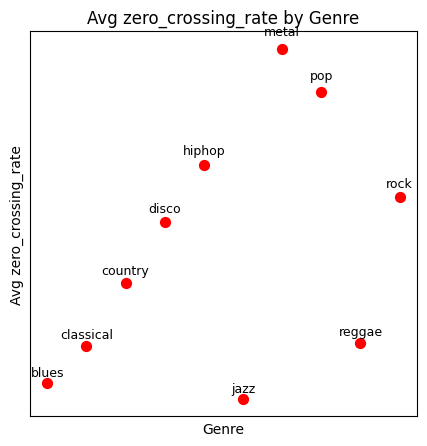

In [9]:
f.visualize_feature('zero_crossing_rate', labeled_features_df)

### 4. Root Mean Square (RMS)

**Explanation:**  
Root Mean Square (RMS) quantifies the loudness or energy of an audio signal. Higher RMS values correspond to louder sounds (Miraglia, 2024).  

**Calculation:**  
The RMS is computed as the square root of the mean of the squared amplitudes. (Wikipedia, 2024-a)  

**Mathematical Formula:**  
$$
RMS = \sqrt{\frac{1}{N} \sum_{i}^{N-1} x_i^2}
$$

(OpenAE, n.d.-b)

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the root mean square differs vastly between genres.


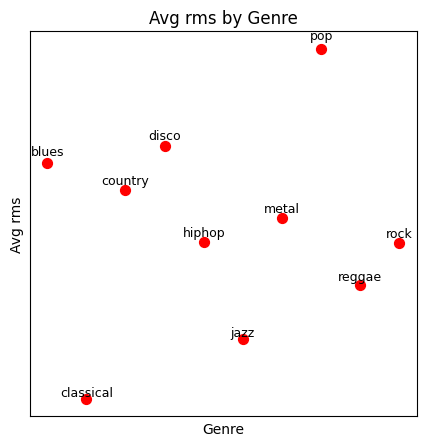

In [10]:
f.visualize_feature('rms', labeled_features_df)

### 5. Spectral Rolloff

**Explanation:**  
Spectral rolloff defines the frequency below which a specified percentage (e.g., 85%) of the total spectral energy is concentrated (OpenAE, n.d.-c). This feature has influence on the frequency of the sound (Librosa, n.d.-c)

**Calculation:**  
The spectral rolloff is calculated by the n% spectral roll off point which is the exact frequency that marks the specicified percentage (e.g., 85%) below the n% energy of all energy is stored (OpenAE, n.d.-c).

**Mathematical Formula:**  
$$
\sum_{m=0}^{r} X_p[m] \geq \frac{n}{100} \sum_{m=0}^{M-1} X_p[m]
$$ 

(OpenAE, n.d.-c)

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the spectral rolloff differs vastly between genres.

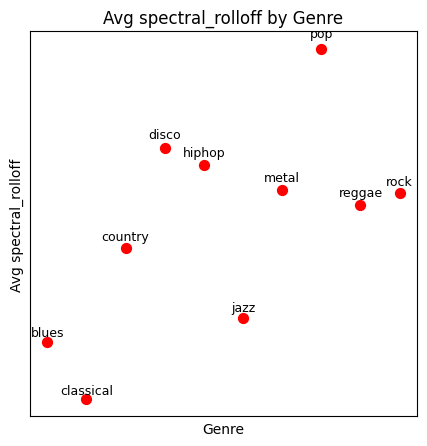

In [11]:
f.visualize_feature('spectral_rolloff', labeled_features_df)

### 6. MFCC Means

**Explanation:**  
Mel-Frequency Cepstral Coefficients (MFCCs) characterize the tonal and textural qualities of an audio signal (perception of loudness or tempo for example). Nowadays, MFCCs are widely used to characterize sound (Sable, 2021).

**Calculation:**  
The MFCC is calculated by computing the cepstrum coefficient for each frame (Wikipedia, 2024-b). Computing the mean MFCC provides a summary of these features across an entire audio clip.

**Mathematical Formula:**

$$
c_i = \sum_{n=1}^{N_f} S_n \cos \left( (n - 0.5) \left( \frac{i \pi}{N_f} \right) \right), \quad i = 1, \dots, L
$$

(Wikipedia, 2024-b)

The mathematical equation of calcuting the arithmetic mean of the MFCC values:

$$
\text{MFCC}_i = \frac{1}{n} \sum_{n=1}^{N} \text{MFCC}(i, n)
$$  

(Wikipedia, 2025-a).

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the MFCC mean differs vastly between genres.

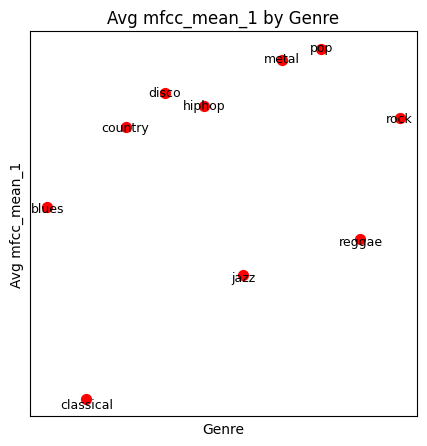

In [12]:
f.visualize_feature('mfcc_mean_1', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

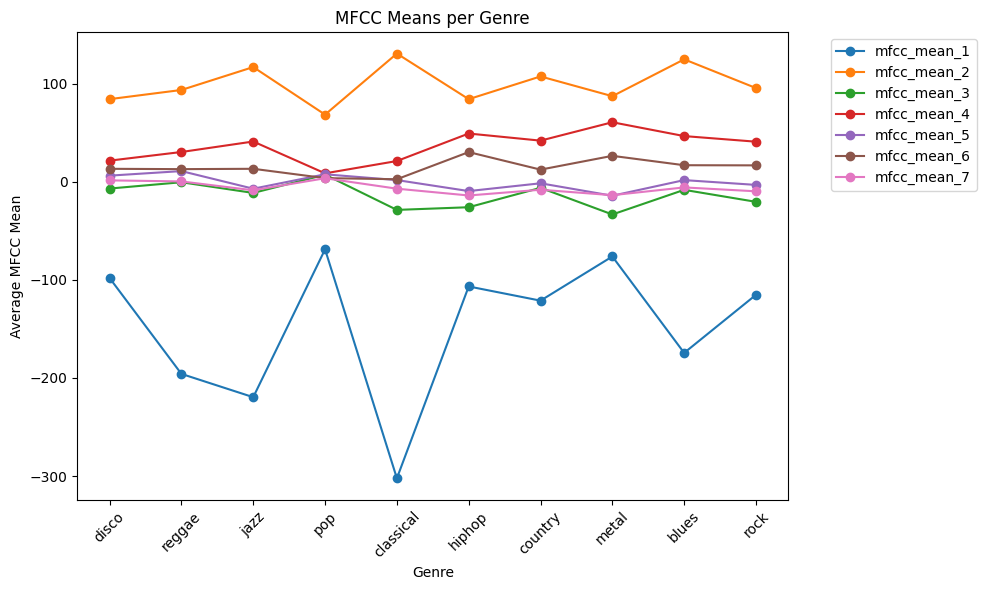

In [13]:
f.visualize_feature_multiline(df=labeled_features_df, feature_prefix='mfcc_mean_', num_sub_features=7, x_col='genre', x_label='Genre',y_label='Average MFCC Mean',title='MFCC Means per Genre')

### 7. Chroma Mean

**Explanation:**  
Chroma features capture the energy distribution across the 12 pitch classes (e.g., C, D, E, etc.) within an octave (Sable, 2022). The Chroma Mean represents the average intensity of these pitch classes over the entire audio clip.  

**Calculation:**  
To calculate "such chroma vectors all tones of different octave of the corresponding 12 half tones are mapped into one octave. This means that for example tone ”A” is added to a value, whose sum represents a component of the chroma vector, regardless of its respective octave" (Englmeier et al., 2023, p. 185).

**Mathematical Formula:**  
$$
CV(i) = \sum_{m=0}^{M-1} |X_{CQ}(i + 12m)|
$$

(Englmeier et al., 2023)

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the chroma mean differs vastly between genres.

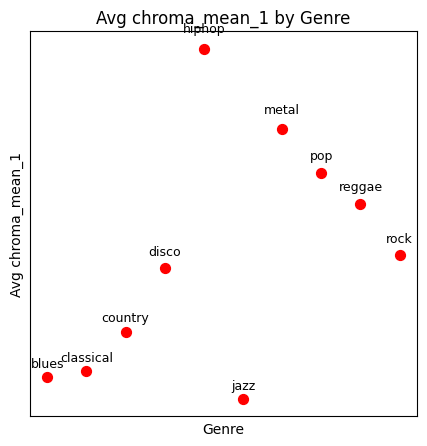

In [14]:
f.visualize_feature('chroma_mean_1', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

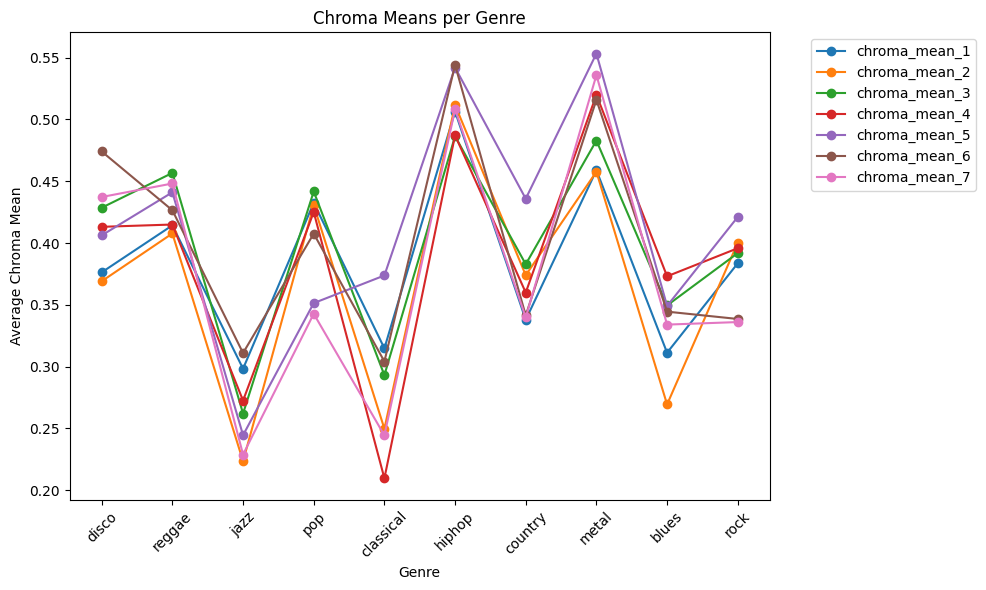

In [15]:
f.visualize_feature_multiline(df=labeled_features_df, feature_prefix='chroma_mean_', num_sub_features=7, x_col='genre', x_label='Genre',y_label='Average Chroma Mean',title='Chroma Means per Genre')

### 8. Tempo

**Explanation:**  
Tempo represents the speed of an audio signal, typically measured in beats per minute (BPM). It plays a crucial role in genre classification (Wikipedia, 2025-b).

**Calculation:**  
Librosa determines the BPM by finding a global (for the entire audio file) tempo first. This global tempo is then used to build a cost function and afterwards tries to find the best-fitting beat times. The times should present the tempo from the audio as well as possibly (Elis, 2007). 

**Mathematical Formula:**  
$$
\text{Tempo (BPM)} = \frac{60}{\text{Average Beat Interval (seconds)}}
$$

(OmniCalculator, 2024)

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the tempp differs vastly between genres.

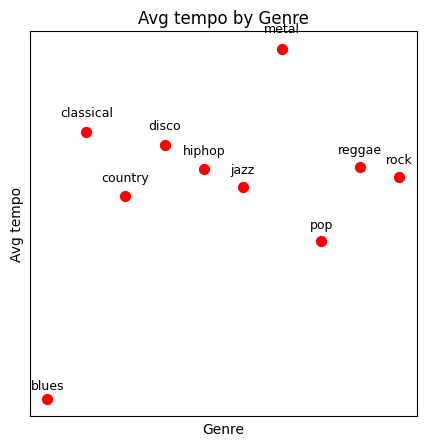

In [16]:
f.visualize_feature('tempo', labeled_features_df)

### 9. Spectral Contrast

**Explanation:**  
Spectral Contrast quantifies the amplitude difference between high-energy (peaks/top quartile) and low-energy (valleys/bottom quartile) regions within frequency bands (Sable, 2021). 

**Calculation:**  
The Spectral contrast can be calculated by dividing the peak (point with highest energy) through the valley (point with lowest energy). The 10 x log10(rate) is used to properly convert the quotient into decibels (Yuto, 2024). The mean spectral contrast provides an overall summary of these values across all frames.

**Mathematical Formula:**  
$$
\text{Spectral Contrast} = 10 \times \log_{10} \left( \frac{\text{Peak Value}}{\text{Valley Value}} \right)
$$

(Yuto, 2024)

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the spectral contrast mean differs vastly between genres.

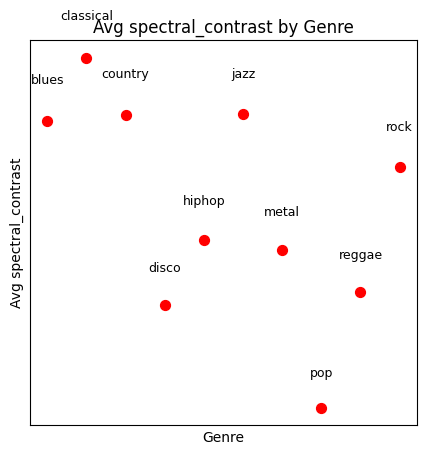

In [17]:
f.visualize_feature('spectral_contrast', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

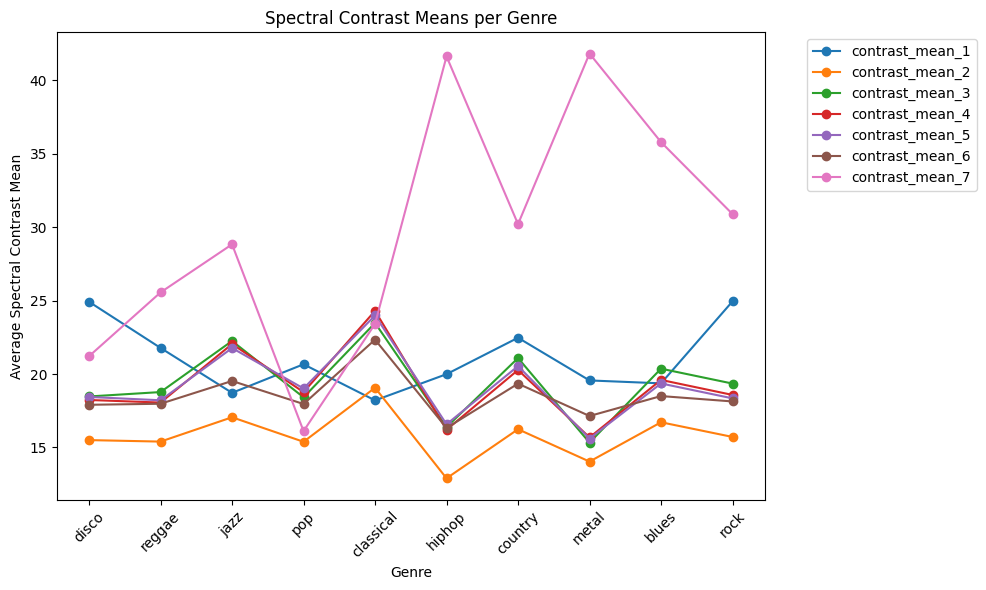

In [18]:
f.visualize_feature_multiline(df=labeled_features_df,feature_prefix='contrast_mean_',num_sub_features=7,x_col='genre', x_label='Genre',y_label='Average Spectral Contrast Mean', title='Spectral Contrast Means per Genre')

### 10. Tonnetz Mean

**Explanation:**  
Tonnetz features represent harmonic relationships between pitches, such as intervals or chords (Wikipedia, 2024-c).   

**Calculation:**  
Librosa transforms chroma features into the Tonnetz space and maps the interval like major third onto two-dimensional coordinates (Librosa, n.d-d). The Tonnetz Mean summarizes these relationships over time and computes the average value.

**Mathematical Formula:**  
$$
\text{Tonnetz Mean}_i = \frac{1}{n} \sum_{n=1}^{N} \text{Tonnetz}(i, n)
$$

Unfortunately, we were not able to find a good formula for this feature. Hence, we decided to simple describe how the arithmetic mean of the observed Tonnetz values could be calculated (Wikipedia, 2025-a).

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the tonnetz mean differs vastly between genres. 


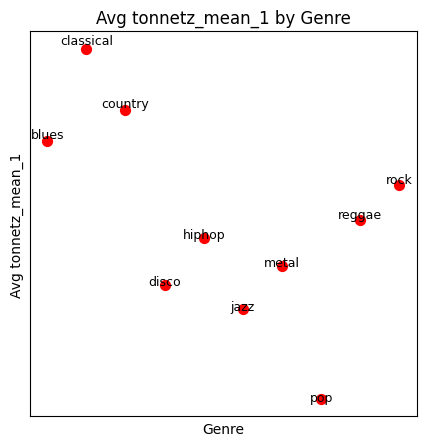

In [19]:
f.visualize_feature('tonnetz_mean_1', labeled_features_df)

To display not just one mean value, we can use a multi-line plot.

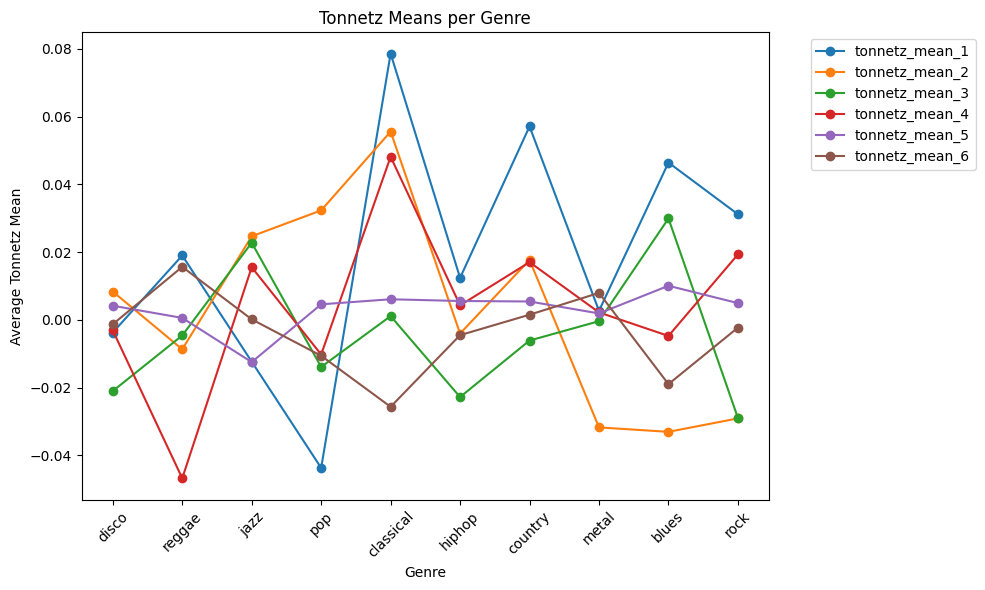

In [20]:
f.visualize_feature_multiline(df=labeled_features_df,feature_prefix='tonnetz_mean_', num_sub_features=6, x_col='genre', x_label='Genre',y_label='Average Tonnetz Mean',title='Tonnetz Means per Genre')

### 11. Spectral Flatness

**Explanation:**  
Spectral Flatness measures the resemblance of a sound to a pure tone. Lower values indicate purer tones, while higher values suggest noise-like signals (Wikipedia, 2024-d).  

**Calculation:**  
The spectral flatness is calculated by dividing the geometric mean by the arithmetic mean of the spectral magnitudes (Wikipedia, 2024-d).

**Mathematical Formula:**  
$$
\text{Flatness} = \frac{geometric} {arithmetic} = \frac{\sqrt[N]{\prod_{n=0}^{N-1} x(n)}}{\frac{\sum_{n=0}^{N-1} x(n)}{N}} 
= \frac{\exp\left(\frac{1}{N} \sum_{n=0}^{N-1} \ln x(n)\right)}{\frac{1}{N} \sum_{n=0}^{N-1} x(n)}
$$

(Wikipedia, 2024-d)

**Reason for including this feature:**  
The chart below shows that this feature is important to distinguish genres as the spectral flatness differs vastly between genres. 

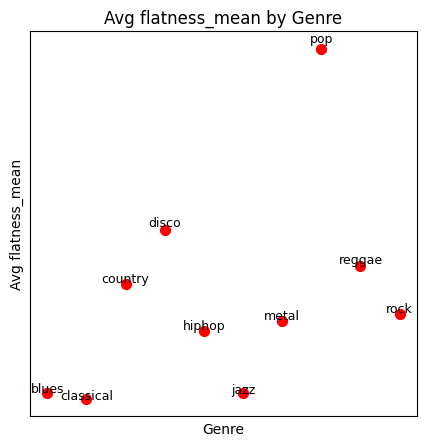

In [21]:
f.visualize_feature('flatness_mean', labeled_features_df)

Especially the genres "pop" & "classical" often seem to differ a lot from the rest of the genres which makes them potential candidates to be one of the clusters. Of course this is only based now on the labeled dataset and has to be analysed thoroughly.  So we calcualte the average mean for all features per genre and map them agains the average feature value across ALL features and display them:

In [22]:
avg_features_by_genre = labeled_features_df.groupby('genre').mean().reset_index()

avg_features_by_genre['overall_mean'] = avg_features_by_genre.drop('genre', axis=1).mean(axis=1)

average_mean_across_genres = avg_features_by_genre.mean()

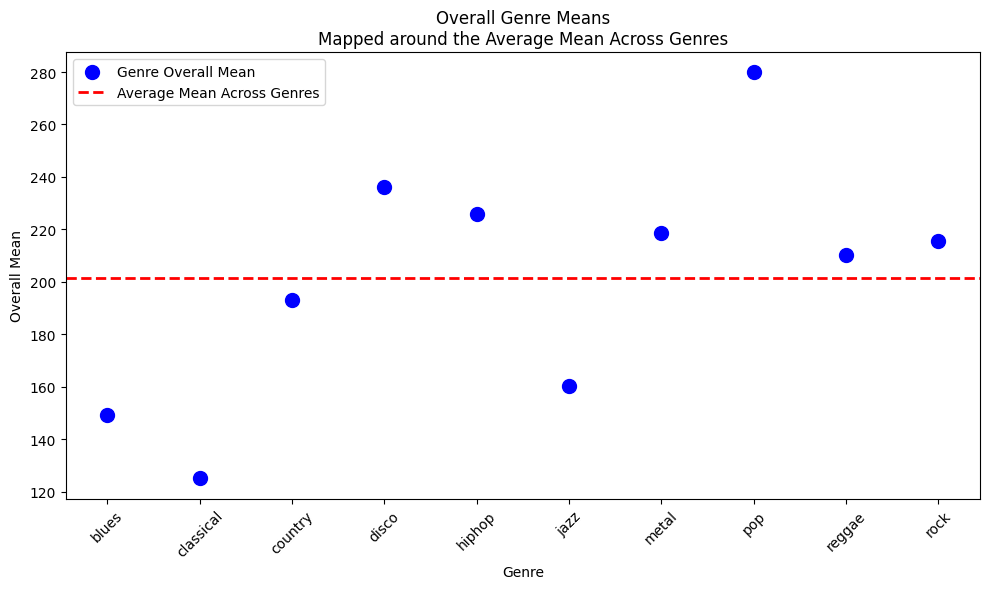

In [23]:
df_genre = labeled_features_df.groupby('genre').mean().reset_index()

df_genre['overall_mean'] = df_genre.drop('genre', axis=1).mean(axis=1)

average_mean_across_genres = df_genre['overall_mean'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(df_genre['genre'], df_genre['overall_mean'], color='blue', s=100, label='Genre Overall Mean')

plt.axhline(y=average_mean_across_genres, color='red', linestyle='--', linewidth=2, label='Average Mean Across Genres')

plt.xlabel('Genre')
plt.ylabel('Overall Mean')
plt.title('Overall Genre Means\nMapped around the Average Mean Across Genres')

plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Plotting the average values of all features per genre against the total average value across all features and genres, supports our first guess that the genres "classical" and "pop" are good candidates for potential clusters based on the labeled dataset. A third potential cluster could either be metal or hiphop because they seemingly display a decent average of the values of the other clusters (except classical and pop). 

Of course, this needs more in-depth analysis for the unlabeled dataset but the EDA of the labeled datasets provides useful insights. 

### Scale Numeric Features for NMF Compatibility  
This cell processes numeric features from the labeled and unlabeled feature DataFrames to prepare them for Non-Negative Matrix Factorization (NMF):  
- Numeric columns are extracted from both `unlabeled_features_df` and `labeled_features_df` using `select_dtypes(include=[np.number])`.  
- If a `cluster` column exists, it is dropped from both DataFrames to ensure only relevant features are included.  
- A `MinMaxScaler` is initialized with a range of 1 to 2. This scaling range was chosen to avoid issues with non-negative numbers encountered during NMF when using `StandardScaler` or a `MinMaxScaler` with a 0 to 1 range.  
- The scaler is fitted on the unlabeled numeric features (`unlabeled_numeric`) and applied to transform both unlabeled and labeled numeric features.  

The resulting scaled feature arrays (`unlabeled_scaled` and `labeled_scaled`) are now ready for dimensionality reduction or further analysis.


In [24]:
unlabeled_numeric = unlabeled_features_df.select_dtypes(include=[np.number])
labeled_numeric = labeled_features_df.select_dtypes(include=[np.number])

if 'cluster' in unlabeled_numeric.columns:
    unlabeled_numeric.drop('cluster', axis=1, inplace=True)
    
if 'cluster' in labeled_numeric.columns:
    labeled_numeric.drop('cluster', axis=1, inplace=True)
    
scaler = MinMaxScaler((1, 2))

unlabeled_scaled = scaler.fit_transform(unlabeled_numeric)
labeled_scaled = scaler.transform(labeled_numeric)

In [25]:
unlabeled_knn = pd.DataFrame(unlabeled_scaled, columns=unlabeled_numeric.columns)
labeled_knn = pd.DataFrame(labeled_scaled, columns=labeled_numeric.columns)

# 3. Unsupervised Learning

### K-Means Clustering:

K-Means Clustering is an **unsupervised learning algorithm** designed to partition an unlabeled dataset into distinct clusters. The parameter \( K \) specifies the number of clusters, e.g., $ K = 5 $ creates **five clusters**, and $ K = 10 $ forms **ten clusters**.  

#### Objectives of K-Means Clustering:  
1. Identify the optimal positions of $ K $ cluster centers (centroids).  
2. Assign each data point to the closest cluster based on **distance metrics**.  


### Workflow of the K-Means Algorithm  

#### **Step 1: Choose the Number of Clusters ($ K $)**  
- Determine $ K $ using methods like the **Elbow Method** or domain knowledge.  

#### **Step 2: Initialize $ K $ Cluster Centers**  
- Randomly select $ K $ data points as initial cluster centers.  

#### **Step 3: Compute Distances**  
- Calculate the distance between each data point and all cluster centers using the **Euclidean distance**:  
  
  $$
  D^{(n,k)} = \sqrt{\sum_{m=1}^{M} \left( x_m^{(k)} - c_m^{(k)} \right)^2 }
  $$  

#### **Step 4: Assign Data Points to Clusters**  
- Allocate each data point to the cluster with the nearest center based on the computed distances.  

#### **Step 5: Update Cluster Centers**  
- Recalculate the cluster centers as the **mean** of the data points assigned to each cluster:  

#### **Step 6: Iterate until good clusters are found**  
- Iterate **Steps 3 to 5** until one of the following occurs:  
  - Cluster assignments **stabilize**.  
  - A **maximum number of iterations** is reached.  
  - The cluster centers become **unchanged**.  

(Sena, 2024).


### Hierarchical Clustering  

Hierarchical clustering is an **unsupervised learning algorithm** that groups data points based on similarity. Unlike **K-Means clustering**, hierarchical clustering does not require specifying the number of clusters beforehand. Instead, it generates a **tree-like structure (dendrogram)** that visualizes the hierarchy between data points (Wilson, n.d.-a). 



### Workflow of Hierarchical Clustering  (using Agglomerative Clustering)

1. **Compute Distance of invidual points**  
   - Measure the similarity or distance between all pairs of data points.

2. **Initialize Each Data Point as a Separate Cluster**  
   - Begin with $ n $ clusters, where each cluster contains a single data point.

3. **Merge the Closest Clusters**  
   - Combine the two clusters that are the most similar.

4. **Repeat Until One Cluster Remains**  
   - Continue merging clusters iteratively until all points are grouped into a **single cluster** or you cut the clustering at some point.

(Patlolla, 2018)

### Dendrogram: Visual Representation of Clusters  

A **dendrogram** is a hierarchical tree structure that illustrates how clusters are formed.  

- A joining of two vertical line displays the merging of two clusters.
- The **height of each merge** indicates the distance between merging clusters and hence, the dissimilarity of each cluster.  
- A **horizontal cut** at a specific height determines the final number of clusters.  

(Wilson, n.d.-a) 

### Types of Hierarchical Clustering  

#### **1. Agglomerative Clustering (Bottom-Up)**  
- Begins with **each data point as its own cluster**.  
- Clusters are **iteratively merged** based on similarity.  
- This is the **most common approach** to hierarchical clustering.  

#### **2. Divisive Clustering (Top-Down)**  
- Starts with **one large cluster** containing all data points.  
- The cluster is **recursively split** into smaller clusters.  
- Computationally more intensive and less commonly used.  

(Wilson, n.d.-a) 


### Gaussian Mixture Model (GMM)

The **Gaussian Mixture Model (GMM)** is a **probabilistic model** used for **unsupervised clustering**. Unlike **K-Means**, which assigns each data point to a single cluster, GMM is a **soft clustering method**, meaning each data point has a **probability of belonging to multiple clusters**.

GMM assumes that data is generated from a mixture of multiple **Gaussian distributions**, where each distribution represents a **cluster** in the dataset.

(Carrasco, 2019)

#### **How GMM Works**

A **Gaussian Mixture Model** consists of **$K$ Gaussian distributions**, where each Gaussian is defined by three parameters:

1. **Mean ($\mu$)** – The center of the Gaussian distribution.
2. **Covariance ($\Sigma$)** – Defines the spread and shape of the data.
3. **Mixing Coefficient ($\pi$)** – The probability given by the Gaussian fuction.

Each data point is assigned a probability of belonging to a Gaussian component based on the **Gaussian density function**:

$$
p(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp \left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

where:
- $x$ is a data point,
- $d$ is the number of dimensions,
- $\mu$ is the mean vector,
- $\Sigma$ is the covariance matrix.

(Carrasco, 2019)

#### **Expectation-Maximization (EM) Algorithm**

The **Expectation-Maximization (EM) algorithm** is an iterative optimization method used to find **maximum-likelihood estimates** for model parameters iteratively until convergence. It is especially useful for missing data or incomplete datasets (GeeksforGeeks, 2024-a).

##### **Step 1: Initialization**  
- Initialize the **model parameters**:  
  - Mean ($\mu_k$)  
  - Covariance matrix ($\Sigma_k$)  
  - Mixing coefficients ($\pi_k$)

(Carrasco, 2019)

##### **Step 2: Expectation (E-Step)**
- For each data point, calculate the **posterior probabilities**  for every latent variable based on the current parameter estimates.
- Estimate missing/incomplete data based on the current parameter estimates.
- Compute the log-likelihood based on the current parameter estimates.

(GeeksforGeeks, 2024-a)

##### **Step 2: Maximization (M-Step)**  
- Update the **parameters** initizalized in step 1. In order to achieve this, the log-likelihood from the first step should be maximized.

(GeeksforGeeks, 2024-a)

##### **Step 3: Iterate Until Convergence**  
- Repeat the **E-step and M-step** iteratively until:
  - The **log-likelihood function stabilizes**.
  - The **parameters do not change**.

(GeeksforGeeks, 2024-a)


### Why K-Means is the Best Choice

##### **1. Computational Efficiency**
- K-Means is significantly **faster** than hierarchical clustering and GMM.  

##### **2. Scalability**
- Performs **efficiently on large datasets**, making it ideal for clustering **music genres** with **hundreds or thousands** of feature vectors.

##### **3. Interpretability & Simplicity**
- The **Elbow Method** helps determine the optimal number of clusters.  
- Cluster assignments are **clear and deterministic**, ensuring each data point belongs to **only one cluster**.

##### **4. Suitable for Music Genre Classification**
- While GMM provides **probabilistic assignments**, K-Means is **better suited for distinct genre separation**.  
- Most **music features** are naturally **separable**, making **hard clustering** an effective and efficient choice.
 
(Pillai, 2024)

### Short cluster analysis using a Dendogram

Although we decided to use KMeans, we still prove the existence of clusters using a Dendogram (Hierarchical Clustering). We use hierachical clustering to quickly show this because in dendograms are useful tools to visualise clusters and determine if there actaully appropriate clusters that can be worked with (Wilson, n.d.-a). 

,genre,spectral_centroid,spectral_bandwidth,spectral_contrast,zero_crossing_rate,rms,spectral_rolloff,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_mean_12,tempo,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_mean_7,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,flatness_mean
0,blues,1583.387647,1743.755155,21.382800,0.076771,0.140737,3265.544394,-174.428619,124.715576,-8.276219,46.503555,1.639146,16.814379,-5.805165,13.513965,-5.588718,8.347383,-4.738156,5.911988,-8.164141,0.311286,0.269451,0.349556,0.373114,0.349119,0.344532,0.334046,0.328373,0.311602,0.348847,0.490204,0.408726,81.889631,19.364397,16.715296,20.362913,19.597374,19.356412,18.498531,35.784679,0.046457,-0.033015,0.029959,-0.004709,0.010095,-0.018938,0.003776
1,classical,1435.502063,1583.313469,22.110814,0.085169,0.048953,2629.373969,-302.222687,130.584625,-28.716290,21.090893,1.679117,2.532542,-7.093253,-2.551281,-6.501498,-0.672896,-4.447047,-0.389472,-1.918007,0.314833,0.249797,0.293173,0.209692,0.373792,0.304192,0.244443,0.287302,0.208627,0.213330,0.200808,0.262671,125.749196,18.204398,19.063758,23.473306,24.298980,23.985334,22.339266,23.410659,0.078630,0.055605,0.001145,0.048180,0.006111,-0.025628,0.002710
2,country,2083.312910,2181.117729,21.450688,0.099472,0.129948,4306.812158,-121.193581,107.285667,-6.236919,41.865299,-1.597312,12.319678,-8.168999,9.522408,-11.369371,6.365363,-9.221376,4.105277,-6.917764,0.337929,0.373985,0.382874,0.359965,0.435879,0.341440,0.339823,0.362007,0.331875,0.377736,0.301877,0.363435,115.251335,22.467507,16.240261,21.087958,20.274981,20.538509,19.343294,30.202305,0.057125,0.017718,-0.006070,0.017061,0.005458,0.001556,0.022542
3,disco,2561.331811,2572.697428,19.239101,0.113463,0.146992,5418.128614,-98.128128,84.145569,-6.965862,21.479712,6.199300,13.156633,1.373872,7.650606,-1.148144,8.367705,-1.763279,2.020654,-1.363621,0.376317,0.369123,0.428605,0.413146,0.406251,0.474107,0.437273,0.443585,0.406097,0.388219,0.416873,0.353995,123.609251,24.913208,15.501331,18.471161,18.231577,18.438439,17.905199,21.212789,-0.003701,0.008388,-0.020978,-0.003075,0.004206,-0.001252,0.032018
4,hiphop,2519.631562,2310.307216,19.999706,0.126286,0.109819,5228.446575,-106.723000,84.119041,-25.998526,49.109497,-9.531994,30.189159,-14.019757,23.612549,-8.324580,19.381561,-8.067240,15.628366,-4.759068,0.506444,0.511663,0.486433,0.487191,0.542024,0.544146,0.508202,0.524667,0.538439,0.528660,0.528233,0.487627,119.683699,19.989642,12.900560,16.383496,16.203225,16.576416,16.327493,41.617107,0.012425,-0.004003,-0.022746,0.004313,0.005603,-0.004476,0.014526
5,jazz,1675.108026,1944.565406,21.454712,0.073069,0.072097,3532.048176,-219.556396,116.833206,-11.430482,40.971138,-7.129291,13.170842,-8.729212,8.838263,-6.542282,7.280858,-3.951908,5.148025,-3.628637,0.298365,0.223566,0.262086,0.272597,0.244558,0.311038,0.228899,0.294856,0.322657,0.299974,0.292729,0.271400,116.665141,18.717708,17.055670,22.247993,22.041711,21.767406,19.526246,28.826247,-0.012308,0.024695,0.022804,0.015570,-0.012434,0.000192,0.003686
6,metal,2557.961237,2188.541721,19.881724,0.152806,0.119193,4955.681011,-76.188950,87.152725,-33.372551,60.600761,-14.281543,26.367285,-13.714350,22.767662,-14.398664,17.076969,-11.760866,12.119621,-14.697382,0.458911,0.457746,0.482940,0.519924,0.553315,0.515883,0.535926,0.558651,0.563556,0.551451,0.512477,0.489767,139.296301,19.562057,14.038759,15.327425,15.682705,15.608754,17.141493,41.810875,0.002704,-0.031701,-0.000351,0.002233,0.001927,0.007988,0.016119
7,pop,3102.778575,2952.233656,18.045874,0.143026,0.184845,6523.894400,-68.912933,68.395828,7.174559,8.544607,7.558121,3.670377,3.551128

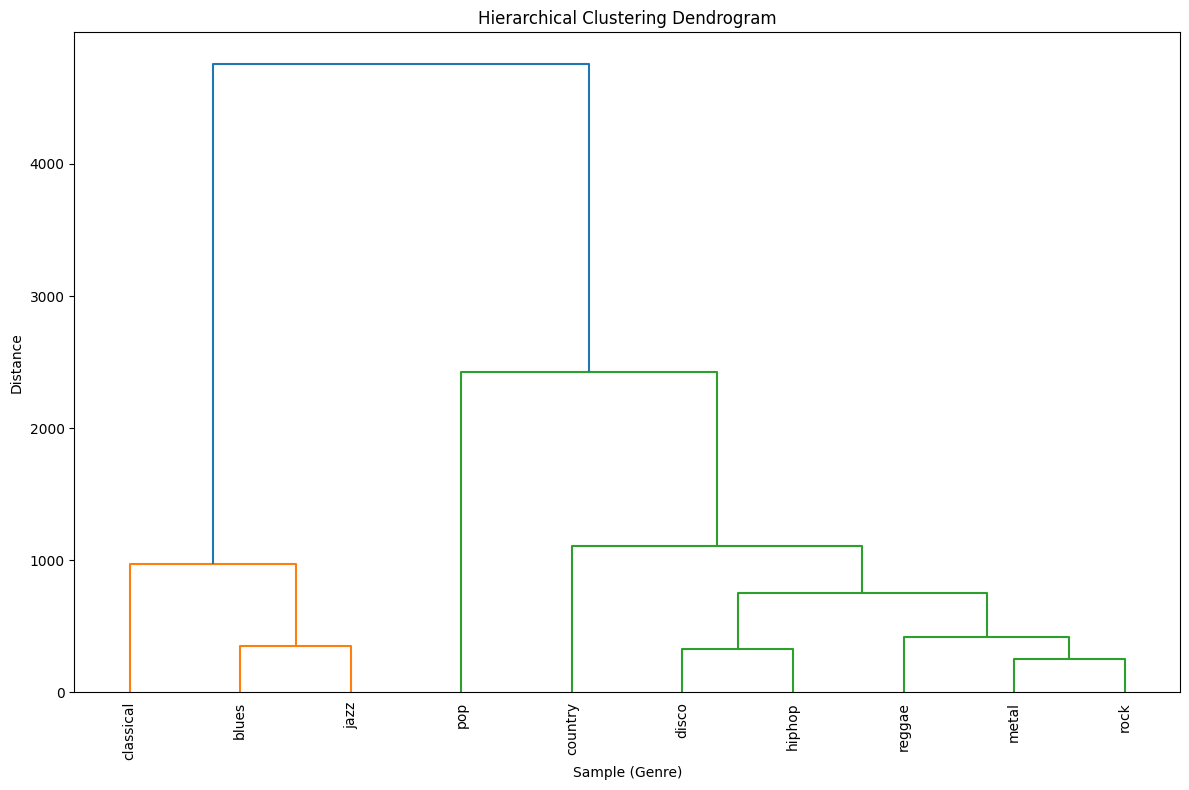

In [26]:
group_cols = [col for col in labeled_features_df.columns if col not in ['filename']]
genre_agg = labeled_features_df.groupby('genre')[group_cols].mean().reset_index()

display(genre_agg)

feature_columns = [col for col in genre_agg.columns if col != 'genre']
X = genre_agg[feature_columns].values

Z = linkage(X, method='ward')

plt.figure(figsize=(12, 8))

labels = labeled_features_df['genre'].values

dendrogram(
    Z,
    labels=genre_agg['genre'].values,
    leaf_rotation=90,  
    leaf_font_size=10,
    color_threshold=0.7 * max(Z[:, 2]) 
)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample (Genre)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

The dendogram clearly shows that clusters exist. Based on the structure of the dendogram, there are most likely three clusters in this dataset. 

1. Cluster: (Classical, Blues, Jazz)
2. Cluster: (Pop, Country)
3. Cluster (Disco, Hiphop, Reggae, Metal, Rock)

## 3.1 KMeans 

## Mathematical operations of KMeans

Below is an explanation of KMeans using a small fictious dataset of four datapoints (A,B,C,D) and 2 features (Feature 1 and Feature 2). To calcualte the distances, the Euclidean distance will be used. For simplicity we assume that the number of clusters is 2. 

| Point | Feature 1 (x₁) | Feature 2 (x₂) |
|-------|----------------|----------------|
| A     | 1.0            | 2.0            |
| B     | 2.0            | 3.0            |
| C     | 6.0            | 7.0            |
| D     | 7.0            | 8.0            |

At first, two random points will be selected to act as the centroids for the clusters. In our case we we will select Point A for cluster 1 and Point D cluster 2. 

<br>

Then, we will calculate the distance from each point to the centroids using the Euclidean distance (theory see above). 

Point A: The distance towards the first centroid is 0 since its the same point. Point A therefore belongs to cluster 1.

Point B: 
The distance from Point B towards the first centroid can be calculated by: $ \sqrt{(2 - 1)^2 + (3 - 2)^2} = 1.41 $

The distance from Point B towards the second centroid can be calculated by: $ \sqrt{(2 - 7)^2 + (3 - 8)^2} = 7.07 $

**It is quite clear, that Point B belongs to Cluster 1.**

Point C:
The distance from Point C towards the first centroid can be calculated by: $ \sqrt{(6 - 1)^2 + (7 - 2)^2} = 7.07 $

The distance from Point C towards the second centroid can be calculated by: $ \sqrt{(7 - 7)^2 + (7 - 8)^2} = 1 $

**It is quite clear, that Point C belongs to Cluster 2.**

Point D: The distance towards the second centroid is 0 since its the same point. Point D therefore belongs to cluster 2.

<br>
  
After that, the centroids of the newly formed clusters are calculated again (mean of all datapoints):

For Cluster 1: Point A + B = $ ((1, 2) + (2, 3))/2 = (1,5/2,5) $

For Cluster 2: Point C + D = $ ((6, 7) + (7, 8))/2 = (6,5/7,5) $

Based on the newly calculated centroids the calculations from step 1 for all points (A,B,C,D):

Point A: 
The distance from Point A towards the first centroid can be calculated by: $ \sqrt{(1 - 1,5)^2 + (2 - 2,5)^2} = 0.71 $  

The distance from Point A towards the second centroid can be calculated by: $ \sqrt{(1 - 6,5)^2 + (2 - 7,5)^2} = 7.78 $

**It is quite clear, that Point A belongs to Cluster 1.**

Point B: 
The distance from Point B towards the first centroid can be calculated by: $ \sqrt{(2 - 1,5)^2 + (3 - 2,5)^2} = 0.71 $

The distance from Point B towards the second centroid can be calculated by: $ \sqrt{(2 - 6,5)^2 + (3 - 7,5)^2} = 6.36 $

**It is quite clear, that Point B belongs to Cluster 1.**

Point C:
The distance from Point C towards the first centroid can be calculated by: $ \sqrt{(6 - 1,5)^2 + (7 - 2,5)^2} = 6.36$

The distance from Point C towards the second centroid can be calculated by: $ \sqrt{(6 - 6,5)^2 + (7 - 7,5)^2} = 0.71 $

**It is quite clear, that Point C belongs to Cluster 2.**

Point D: 
The distance from Point D towards the first centroid can be calculated by: $ \sqrt{(7 - 1,5)^2 + (8 - 2,5)^2} = 7.78 $

The distance from Point D towards the second centroid can be calculated by: $ \sqrt{(7 - 6,5)^2 + (8 - 7,5)^2} = 0.71 $

**It is quite clear, that Point D belongs to Cluster 2.**

<br>

Based on the calculations, KMeans would put Point A and B into the first cluster and Point C and D into the second cluster (Sena, 2024).

### Determine Optimal Number of Clusters for K-Means  
This cell uses the `KMeansClustering` class to identify the optimal number of clusters for the unlabeled dataset:  
- An instance of the `KMeansClustering` class is initialized with the scaled unlabeled feature data (`unlabeled_scaled`) and the original `unlabeled_features_df`.  
- The `finding_k` method is called with a range of cluster numbers (`[2, 11]`).  

The range `[2, 11]` was selected based on domain knowledge:  
- The labeled dataset contains 10 genres, making it impossible for the unlabeled dataset to contain more than 10 meaningful clusters.  
- A minimum of 2 clusters was chosen because having only 1 cluster would indicate no clustering, defeating the purpose of the analysis.  

This process helps determine the ideal number of clusters for the dataset using metrics like the elbow method.


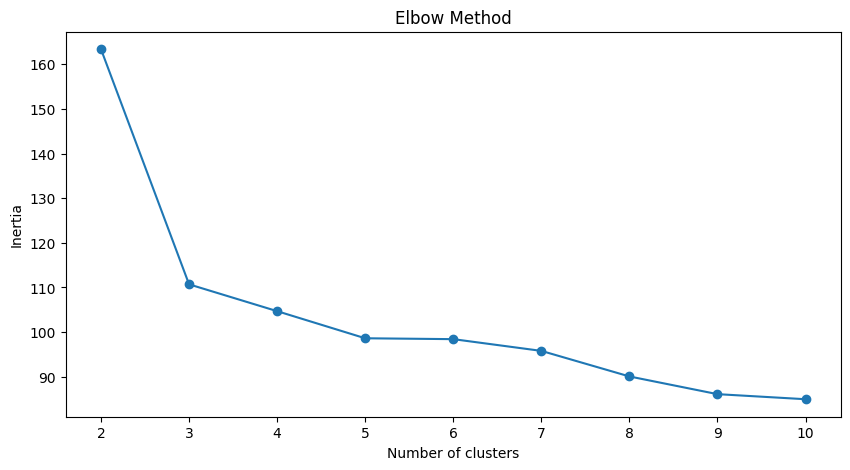

In [27]:
kmc = f.KMeansClustering(unlabeled_scaled, unlabeled_features_df)

kmc.finding_k([2, 11])

### Determining the Optimal Number of Clusters

An iterative approach was applied to determine the optimal number of clusters for the KMeans algorithm. Cluster values ranging from 2 to 10 were evaluated. For each cluster count:

- A KMeans model was trained using the scaled features of the "unlabeled" dataset.
- The **inertia score** (sum of squared distances of samples to their closest cluster center) was recorded to quantify the model's performance.

The results were visualized using an **Elbow Method plot** to identify the ideal number of clusters, where the inertia score shows a significant decrease before plateauing (GeeksforGeeks, 2024-b).



### Optimal Number of Clusters

Based on the **Elbow Plot**, the optimal number of clusters was determined to be **three**. This conclusion is drawn from the point where the inertia score shows a significant decrease and begins to plateau, indicating diminishing returns for higher cluster counts.


In [28]:
clustered_df = kmc.create_kmeans(3)

### Prepare Data for Clustering and Classification  
This cell prepares the data for further analysis and classification:  
- The `cluster` column from the clustered DataFrame (`clustered_df`) is added to the `unlabeled_knn` DataFrame.  
- The unlabeled dataset is split into features (`unlabeled_X`) and labels (`unlabeled_y`), where the `cluster` column serves as the label.  
- The `labeled_knn` DataFrame is assigned to `labeled_X` for use in comparison or model training.  

These steps ensure that both labeled and unlabeled datasets are properly structured for clustering and classification tasks.


In [29]:
unlabeled_knn['cluster'] = clustered_df['cluster']

unlabeled_X, unlabeled_y = unlabeled_knn.drop('cluster', axis=1), unlabeled_knn['cluster']
labeled_X = labeled_knn

### 3.1.1 Determining genres

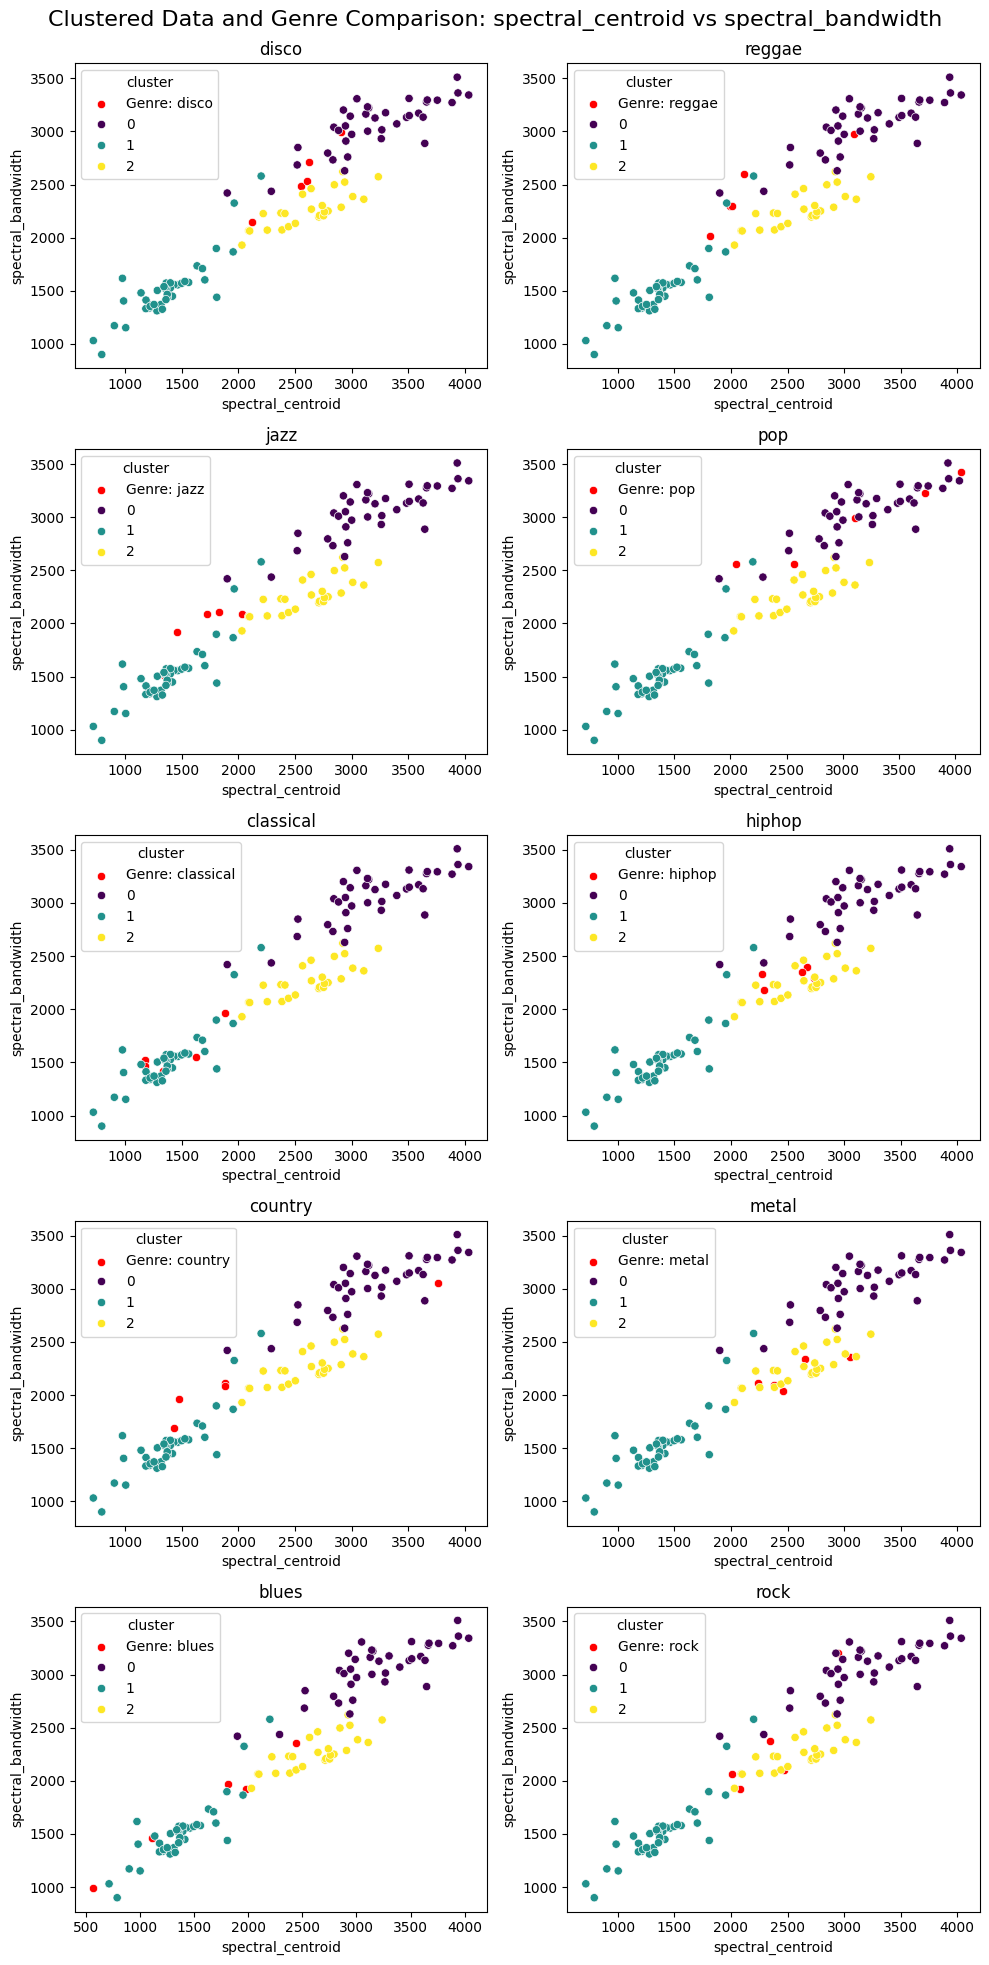

In [30]:
pcv = f.PostClusteringVisualizations(clustered_df, labeled_features_df)

pcv.scatter_plot('spectral_centroid', 'spectral_bandwidth')

#### Clustering Analysis: Spectral Bandwidth vs. Spectral Centroid  

From the analysis of **spectral bandwidth** and **spectral centroid**, distinct clustering patterns were identified. The mapping of clusters to genres is as follows:  

| **Cluster** | **Genres** |  
| --- | --- |  
| 0 | Pop |  
| 1 | Classical |  
| 2 | Hip-Hop, Metal, Rock |  

This mapping highlights that certain genres, such as **Pop**, form a clearly defined cluster due to unique spectral properties, while others, such as **Hip-Hop**, **Metal**, and **Rock**, share overlapping features, grouping them into a single cluster. These results align with the expectation that genres with similar acoustic characteristics often exhibit overlapping clusters.  


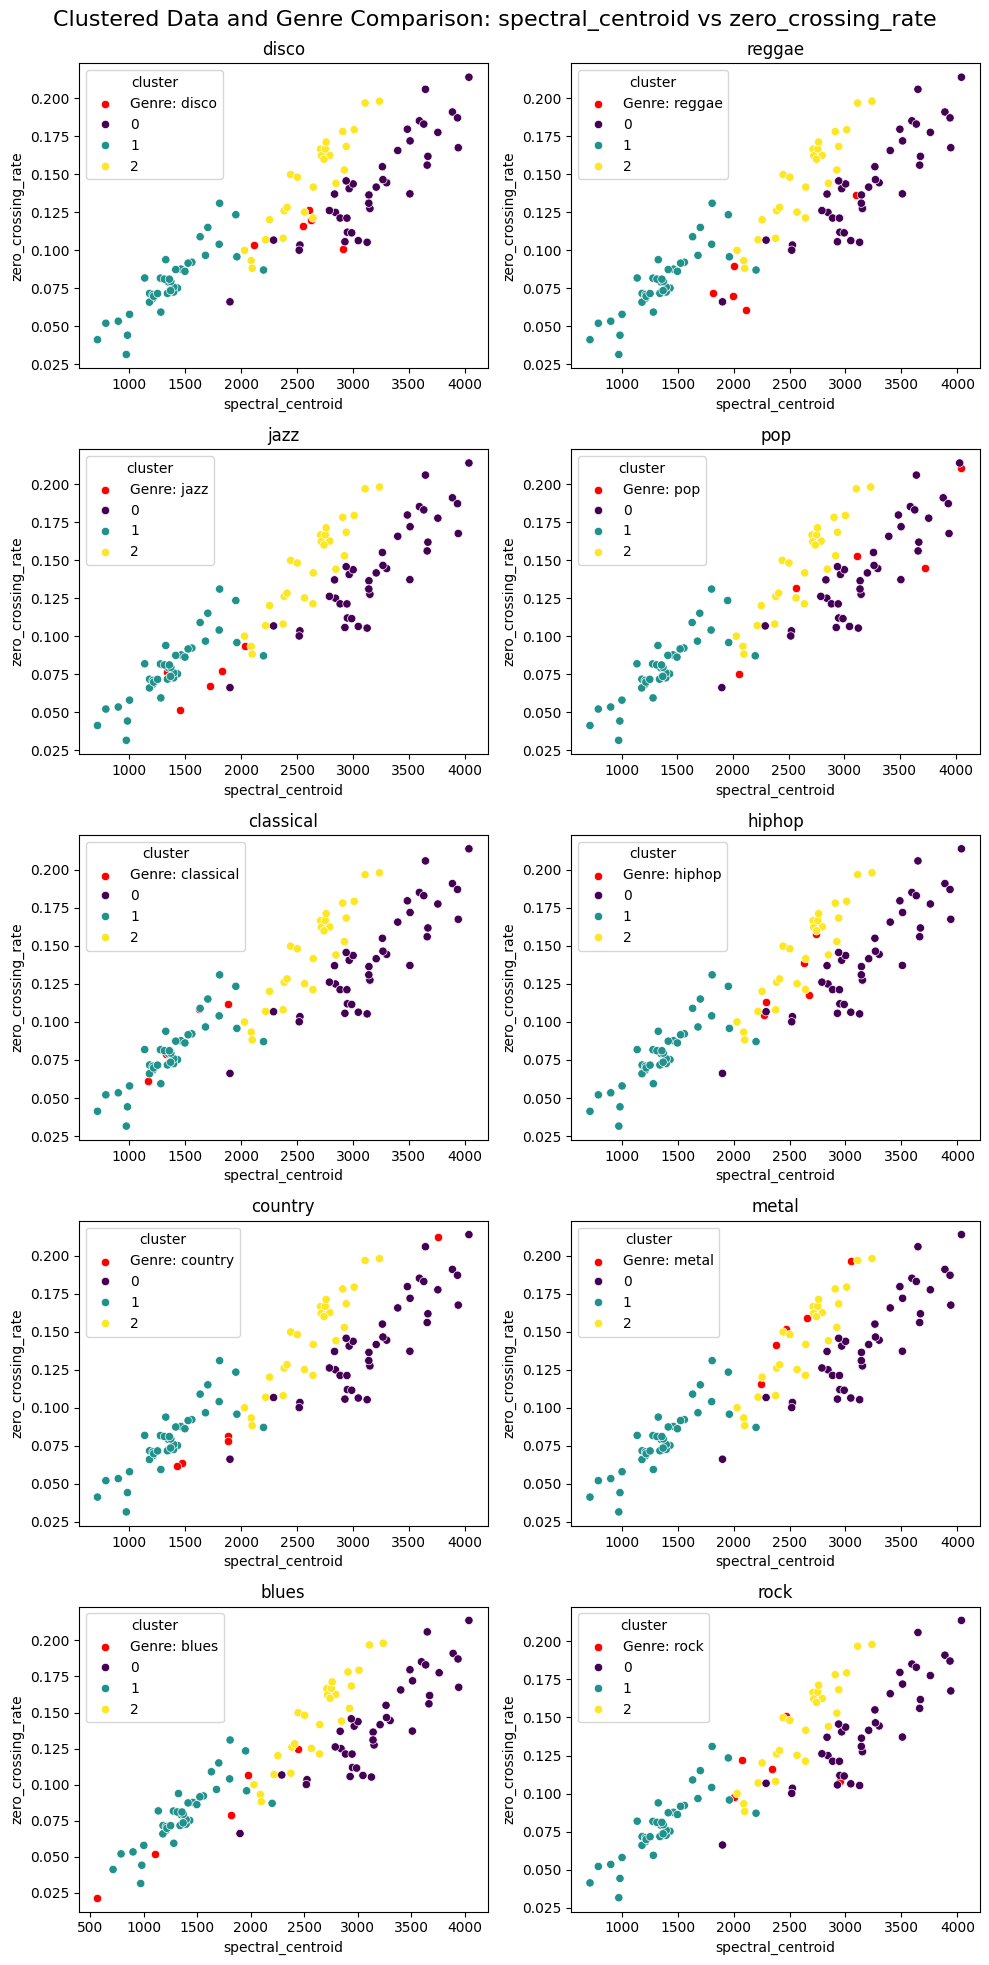

In [31]:
pcv.scatter_plot('spectral_centroid', 'zero_crossing_rate')

#### Clustering Analysis: Zero Crossing Rate vs. Spectral Centroid  

Analyzing the plots of **zero crossing rate** and **spectral centroid** revealed the following genre distributions across clusters:  

| **Cluster** | **Genres** |  
| --- | --- |  
| 0 | Pop |  
| 1 | Classical |  
| 2 | Hip-Hop, Metal |  

#### Key Insights:  
- **Cluster 0**: Strongly associated with the **Pop** genre due to its distinct audio features, making it a well-defined cluster.  
- **Cluster 1**: Clearly aligned with the **Classical** genre, indicating its unique spectral properties.  
- **Cluster 2**: Encompasses genres such as **Hip-Hop** and **Metal**, suggesting overlapping characteristics in terms of zero crossing rate and spectral centroid.  

This clustering analysis establishes a clear mapping for genres with distinct audio profiles, while highlighting the need for additional features or techniques to better separate overlapping genres within Cluster 2.  

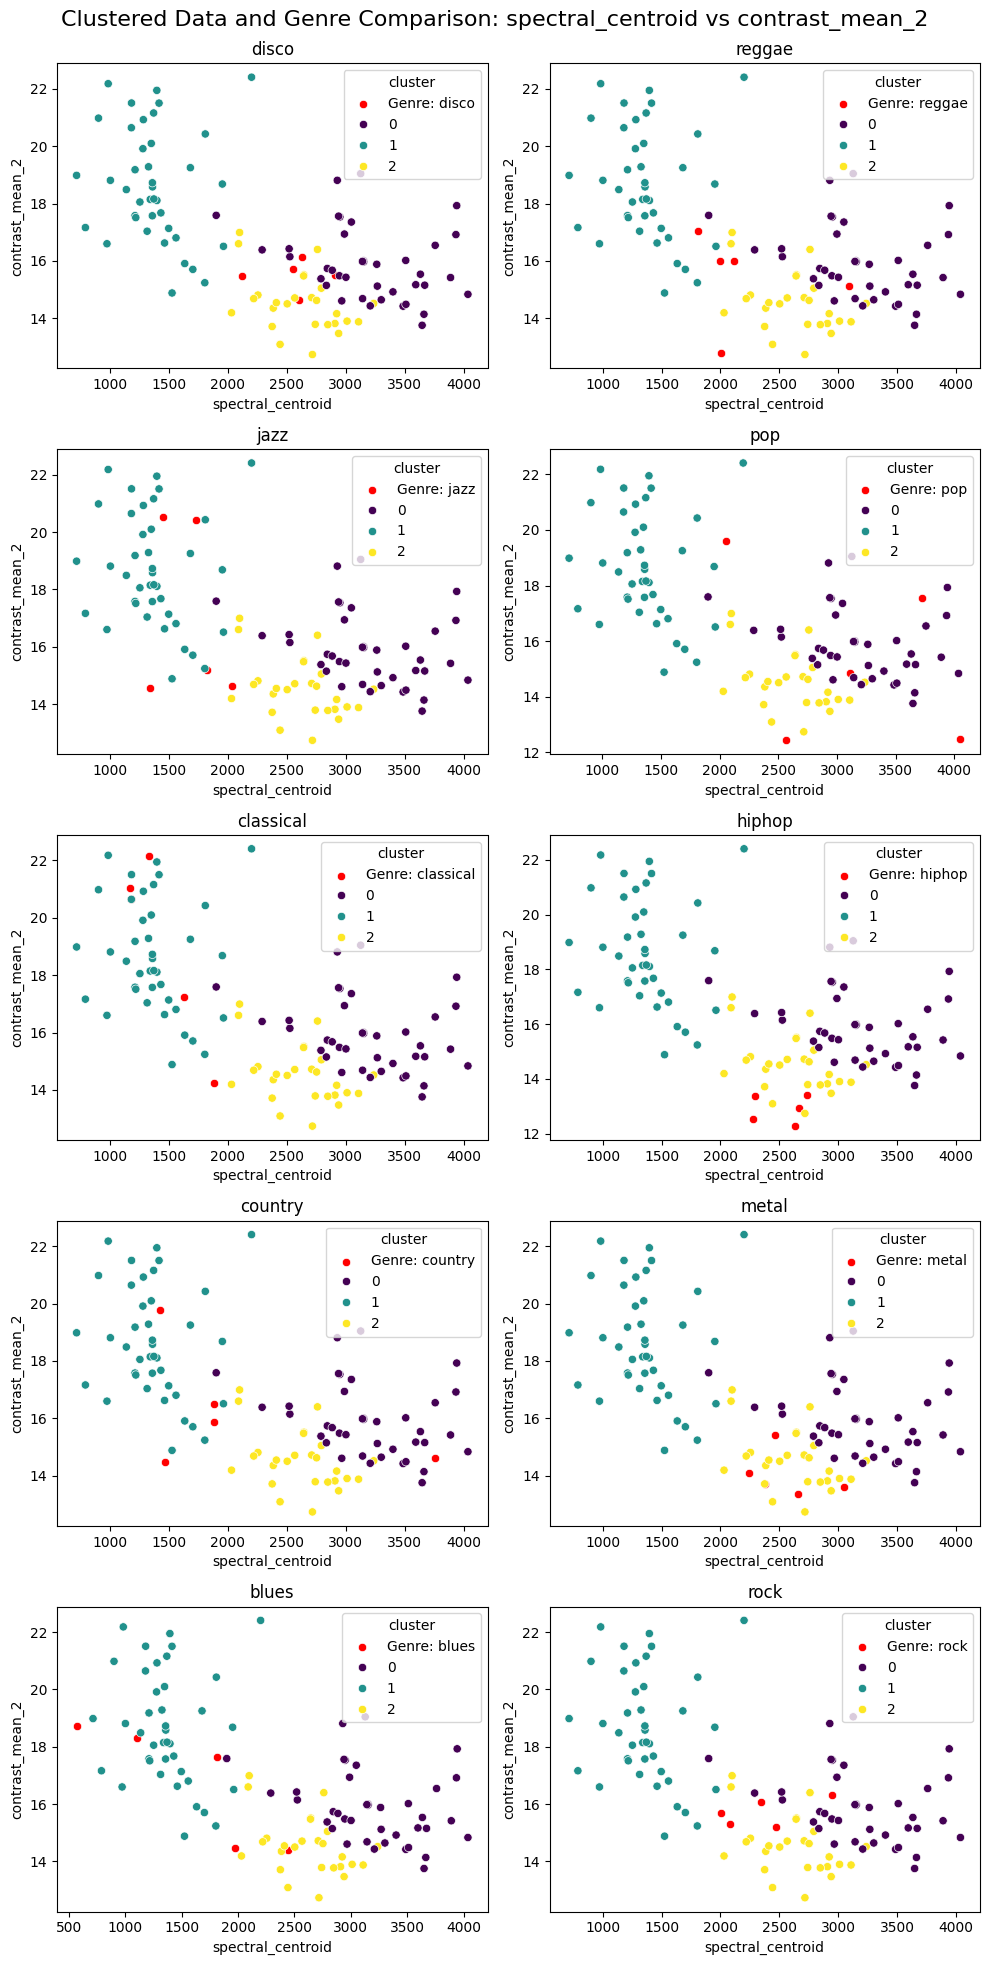

In [32]:
pcv.scatter_plot('spectral_centroid', 'contrast_mean_2')

#### Clustering Analysis: Contrast Mean 2 vs. Spectral Centroid

By analyzing the plots of **Contrast Mean 2** and **Spectral Centroid**, the following genre distributions across clusters were identified:

| **Cluster** | **Genres** |
| --- | --- |
| 0 | Pop |
| 1 | Classical | 
| 2 | Metal |

#### Final Genre Assignments
From all previous visualizations, we can conclude the following:
- **Cluster 0**: Pop
- **Cluster 1**: Classical
- **Cluster 2**: Metal

#### Next Steps
To validate these assumptions, a **K-Nearest Neighbors (KNN)** model will be trained to predict the clusters in the labeled dataset. This will help confirm the accuracy of the clustering results and the genre assignments.


In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(unlabeled_X, unlabeled_y)

predicted_labels = knn.predict(labeled_X)

In [34]:
labeled_features_df['cluster'] = predicted_labels

clusters_genres = labeled_features_df.groupby(['cluster', 'genre']).size().reset_index().sort_values(by=['cluster', 0], ascending=False)

cluster_0 = clusters_genres[clusters_genres['cluster'] == 0]
cluster_1 = clusters_genres[clusters_genres['cluster'] == 1]
cluster_2 = clusters_genres[clusters_genres['cluster'] == 2]

display(cluster_0.head())
display(cluster_1.head())
display(cluster_2.head())

,cluster,genre,0
1,0,disco,4
2,0,pop,4
3,0,reggae,3
4,0,rock,2
0,0,country,1


,cluster,genre,0
6,1,classical,5
8,1,jazz,4
5,1,blues,3
7,1,country,2
9,1,pop,1


,cluster,genre,0
14,2,hiphop,5
16,2,metal,5
18,2,rock,3
11,2,blues,2
12,2,country,2


#### Validation Results: KNN Model

After running the KNN model, we can confirm that both the visual analysis and the mathematical operations arrive at the same conclusion regarding genre assignments:

| **Cluster** | **Genres** |
| --- | --- |
| 0 | Pop |
| 1 | Classical | 
| 2 | Metal |

This alignment between visual insights and predictive modeling validates the clustering results, confirming the accuracy of the genre assignments.

### 3.1.2 Mapping clusters to genres

In [35]:
c0_g = 'pop'
c1_g = 'classical'
c2_g = 'metal'

cluster_genre_mapping = {0: c0_g, 1: c1_g, 2: c2_g}

kmc.cluster_to_genre(cluster_genre_mapping)

kmc.create_submission()

## 3.2 PCA

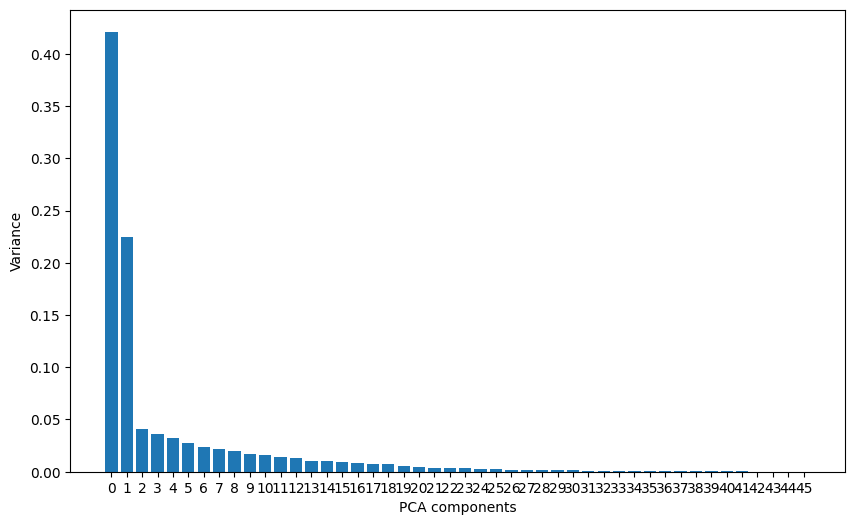

In [36]:
pcar = f.PCAReduction(unlabeled_scaled)

pcar.find_n()

#### Principal Component Analysis (PCA) Feature Selection  

From the PCA plot, it is evident that there is a significant decline in explained variance between the 0th and 1st components, as well as between the 1st and 2nd components. However, beyond the 2nd component, the decline in explained variance becomes negligible.  

Based on this observation (using the elbow method), we will select **2 PCA features** for further analysis.  


In [37]:
pca_features = pcar.reduction(2)
pca_features_labeled = pcar.reduce_labeled(labeled_scaled)

In [38]:
pca_features_df = pd.DataFrame(pca_features, columns=['PCA 1', 'PCA 2'])
pca_features_labeled_df = pd.DataFrame(pca_features_labeled, columns=['PCA 1', 'PCA 2'])
pca_features_labeled_df['genre'] = labeled_features_df['genre']

### 3.2.1 Clustering with PCA

In [39]:
kmc_pca = f.KMeansClustering(pca_features, unlabeled_features_df)

clustered_df_pca = kmc_pca.create_kmeans(3)

In [40]:
pca_features_df['cluster'] = clustered_df_pca['cluster']

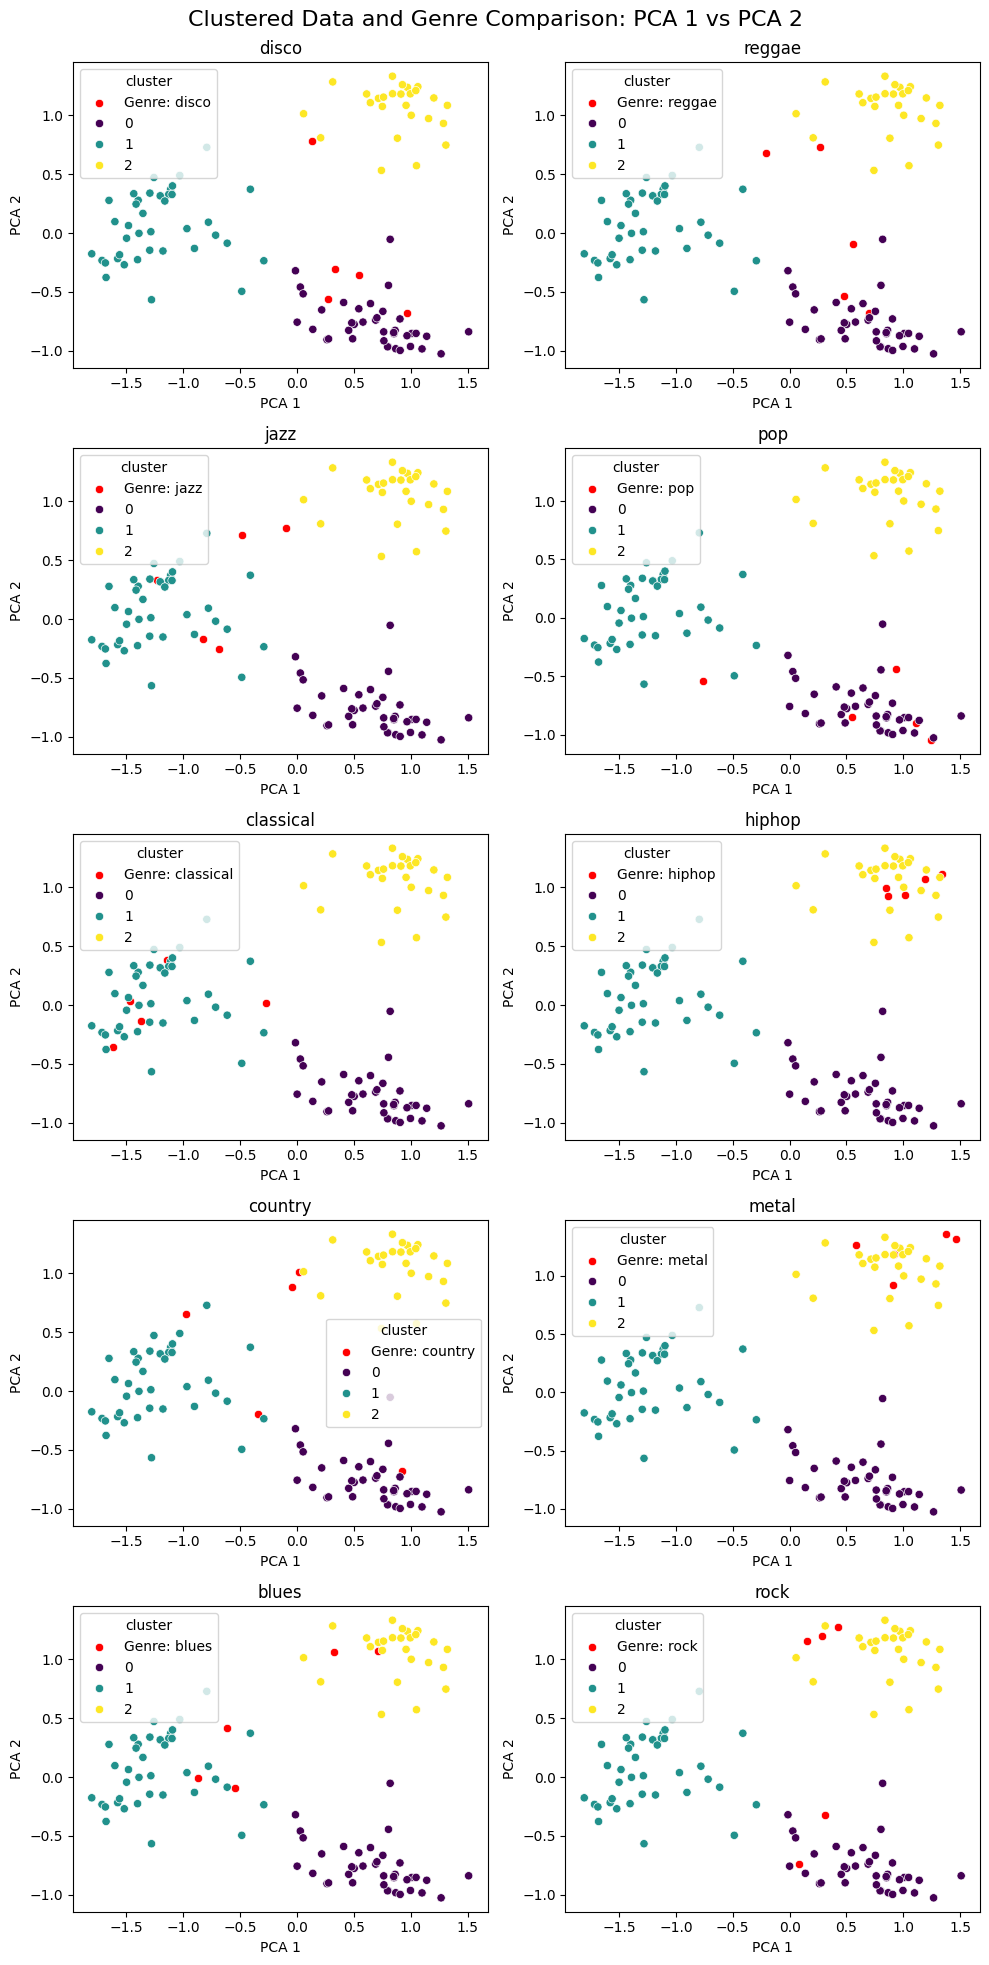

In [41]:
pcv = f.PostClusteringVisualizations(pca_features_df, pca_features_labeled_df)
pcv.scatter_plot('PCA 1', 'PCA 2')

#### PCA Results  

The PCA reduction has effectively created two features that distinctly separate the three clusters, as observed in the plot. This clear separation indicates that the two principal components are sufficient to capture the underlying structure of the data and distinguish between the clusters.


### 3.2.2 Determining genres

In [42]:
pd.crosstab(clustered_df_pca['cluster'], clustered_df['cluster'])

cluster,0,1,2
cluster,,,
0,39,0,0
1,0,40,0
2,0,0,26


#### Cluster Consistency  

From the crosstab, we can observe that the clusters are identical, with no differences between them. Therefore, we will apply the same cluster-to-genre mapping as we did for the standard KMeans clustering approach.


In [43]:
kmc_pca.cluster_to_genre(cluster_genre_mapping)

kmc_pca.create_submission()

### 3.2.3 Theory PCA

PCA (principal component analysis) is a way of dimension reduction. This means that using PCA you can analyse the dimension of the datset and reduce these to make a dataset which is smaller, which would improve runtime and makes models less complicated. A downside of PCA is that the resulting dataset is hard to interpret (Jaadi, 2024).

PCA divided over 5 steps:
1. Scaling the dataset: before any analysis can be run on a dataset it must be scaled.
2. Calculate the covariance matrix: since the PCA reduction uses variance to determine which components need to be kept it is important to calculate to covariance 
3. Calculate the eigenvectors and eigenvalues of the covariancematrix: the values for the newly computed components are the eigenvalues. Therefore it is important to calculate these.
4. Sort the eigenvectors from high to low and than sort the eigenvalues in the same order.
5. Filter to the amount of components chosen.
- (Jaadi, 2024)

When would you use PCA?
1. When working with linear data: other techniques like t-SNE and UMAP are best suited for non-linear data.
2. Computaion: PCA is very computationally efficient.
3. Information preservation: PCA preserves the maximum amount of variance in the dataset, which means that information is preserved most efficiently.
- (Ibm, 2024)

## 3.3 NMF

In [44]:
unlabeled_scaled

array([[1.50253228, 1.44930614, 1.35446236, ..., 1.6508848 , 1.24682309,
        1.07306396],
       [1.0224809 , 1.        , 1.41576621, ..., 1.20499389, 1.41170696,
        1.        ],
       [1.66022739, 1.53112772, 1.39170677, ..., 1.14134136, 1.45271914,
        1.22079289],
       ...,
       [1.97133762, 1.94327291, 1.09240817, ..., 1.15551088, 1.17030979,
        1.75115146],
       [1.08074034, 1.19315871, 1.76179115, ..., 1.63084217, 1.97222776,
        1.00125301],
       [1.16176455, 1.18045394, 1.77262479, ..., 1.53566172, 1.33479381,
        1.00347534]])

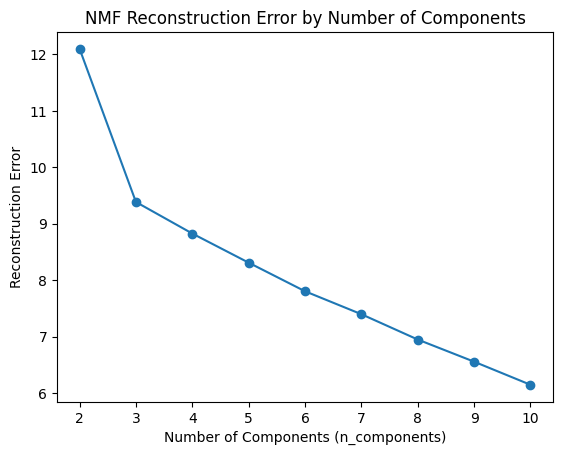

In [45]:
#Revised - Documentation for how many NMF features we used

errors = []
components_range = range(2, 11)

for n in components_range:
    nmf_test = NMF(n_components=n, init='random', random_state=42)
    nmf_test.fit(unlabeled_scaled)
    errors.append(nmf_test.reconstruction_err_)

plt.plot(components_range, errors, marker='o')
plt.title("NMF Reconstruction Error by Number of Components")
plt.xlabel("Number of Components (n_components)")
plt.ylabel("Reconstruction Error")
plt.show()

#### Revised - Documentation for how many NMF features we used
Based on the reconstruction error and the sharpest bend at 3, we used 3 NMF components in our functions.py #NMFReduction (O'Donnell, 2024).

In [46]:
nmfr = f.NMFReduction(unlabeled_scaled)
df_nmf_unlabeled = nmfr.reduction()
df_nmf_labeled = nmfr.reduce_labeled(labeled_scaled)

In [47]:
df_nmf_labeled['genre'] = labeled_features_df['genre']

display(df_nmf_unlabeled.head())
display(df_nmf_labeled.head())

,0,1,2
0,0.227249,0.862498,0.452168
1,0.589472,0.065917,0.805095
2,0.148493,0.855621,0.495846
3,0.613184,0.597203,0.517063
4,0.245401,0.209728,0.946463


,0,1,2,genre
0,0.333534,0.734341,0.591183,disco
1,0.445185,0.651395,0.614407,reggae
2,0.658784,0.360846,0.660147,jazz
3,0.144280,0.215141,0.965866,disco
4,0.060566,0.160581,0.985163,pop


### 3.3.1 Clustering with NMF

In [48]:
kmc_nmf = f.KMeansClustering(df_nmf_unlabeled, unlabeled_features_df)

clustered_df_nmf = kmc_nmf.create_kmeans(3)

In [49]:
df_nmf_unlabeled['cluster'] = clustered_df_nmf['cluster']

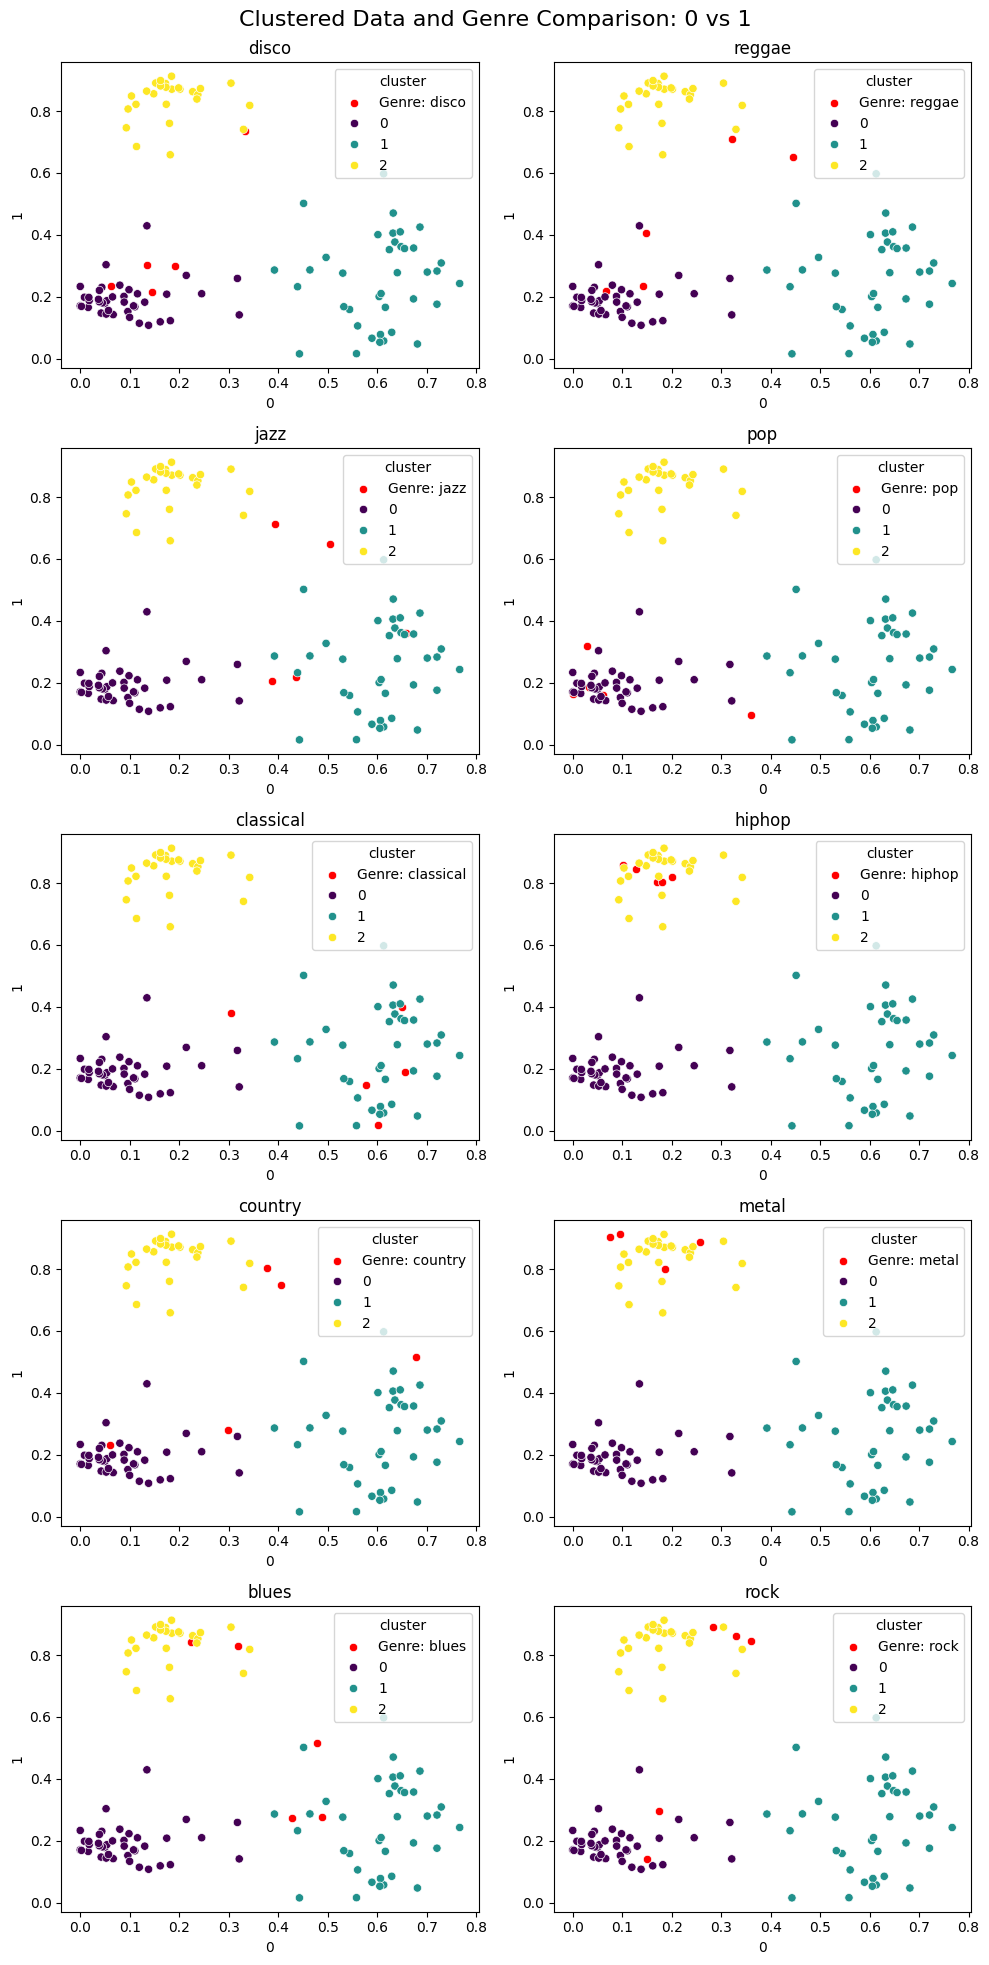

In [50]:
pcv = f.PostClusteringVisualizations(df_nmf_unlabeled, df_nmf_labeled)
pcv.scatter_plot(0, 1)

### 3.3.2 Determining genres

In [51]:
pd.crosstab(df_nmf_unlabeled['cluster'], clustered_df['cluster'])

cluster,0,1,2
cluster,,,
0,41,0,0
1,0,38,0
2,0,0,26


#### Cluster Consistency  

From the crosstab, we can observe that the clusters are identical, with no differences between them. Therefore, we will apply the same cluster-to-genre mapping as we did for the standard KMeans clustering approach.


In [52]:
kmc_pca.cluster_to_genre(cluster_genre_mapping)

kmc_pca.create_submission()

### 3.3.3 Theory NMF

NMF (non-negative matric factorization) is a method of factorizing a non-negative matrix. It is an unsupervised learning algorithm which reduces dimensionality. It is used for recommendation systems, text mining, and image analysis applications (Eunus, 2025). Unlike PCA NMF models are interpretable and therefore easier to explain (Wilson, n.d.-a). 

The basic idea of NMF is to split the original dataset (the original matrix) into 2 smaller datasets (2 smaller sub-matrices) that are easier to understand. In order to do that all values must be positive (as the name "NMF" already suggests). One of the two sub-matrices are the NMF components and the other matrix represents the NMF features. These 2 matrices can be used to approximately reconstruct the original sample (product matrix of the 2 sub-matrices) (Wilson, n.d.-b).

For text documents, the NMF components represent topics (the topic "music genres" might cover words like Metal, Pop, Tempo) in the text while NMF features represent how much a text document is influenced by certain topics (an article about music might be heavily influenced by the topic music but there might be other topics like health or climate inside that document - just with a smaller representation.) (Wilson, n.d.-c).

To apply these principles to our project, this would mean that the raw features we extracted are used to build components based on patterns the algorithm finds in the dataset (=NMF components that combine a set of raw features like spectral centroid, zero crossing rate or mfcc values - the component "Metal" might represent a certain combination of the raw features). The NMF features then try to describe each audio file as a representation of a combination of different components (one audio file might be 90% described by Component 1 (=Metal) and 10% by Component 2 (=Pop)). Then based on our trained KMeans-model the prediction would happen. In this case, the prediction for the concrete audio file would most likely be Metal. 

#### Revised - Added a simple calculation example for NMF like in the clustering chapter

Suppose there is a matrix V:

$$
V = \begin{bmatrix}
2 & 4 \\
3 & 6
\end{bmatrix}
$$

Mathematially speaking, NMF decomposes a non-negative matrix into two lower ranking non-negative matrices:

V=W (basis matrix) * H (coefficients matrix)

Wilson, B. (n.d.-b).

## Step 1: Factorization

In the first step we have to setup the factorization:

Find W:

$$
W = \begin{bmatrix}
w_1 \\
w_2
\end{bmatrix} \quad \text{(a $2 \times 1$ matrix)}
$$

Find H:

$$
H = \begin{bmatrix}
h_1 & h_2
\end{bmatrix} \quad \text{(a $1 \times 2$ matrix)}
$$

in order to be able to (approximately) reconstruct the original matrix V:

$$
W \cdot H = \begin{bmatrix}
w_1 h_1 & w_1 h_2 \\
w_2 h_1 & w_2 h_2
\end{bmatrix} \approx V.
$$

Hence we know that:

$$
w_1*h_1 = 2
$$
$$
w_1*h_2 = 4
$$
$$
w_2*h_1 = 3
$$
$$
w_2*h_2 = 6
$$

Wilson, B. (n.d.-b).

## Step 2: Solve for \(W\) and \(H\)

In the second step, we try and solve for W and H

### Choose a Free Parameter

In NMF you are allowed to manually set one parameter to simplify the calculation (Müller, 2021). In this case we choose: $$h_1$$

So we set:

$$
h_1 = 1.
$$

Then we can solve for (simple system of equations): $$h_2$$ 

$$
\frac{2*h_2}{h_1} = \frac{4}{1} \quad \Longrightarrow \quad \frac{h_2}{h_1} = 2.
$$

and:

$$
\frac{3*h_2}{h_1} = \frac{6}{1} \quad \Longrightarrow \quad \frac{h_2}{h_1} = 2.
$$

So: 
$$
h_2 = 2 
$$



### Determine \(W\) from \(V\) and \(H\)

Now, use the equations from the first column of \(V\):

- From $w_1 \cdot h_1 = 2$, we have:

  $$
  w_1 = \frac{2}{h_1} = 2.
  $$

  $$
  w_1 = \frac{4}{h_2} = 2.
  $$

- From $w_2 \cdot h_1 = 3$, we have:

  $$
  w_2 = \frac{3}{h_1} = 3.
  $$

  $$
  w_2 = \frac{6}{h_2} = 3.
  $$

The result of the factorization is:

$$
W = \begin{bmatrix}
2 \\
3
\end{bmatrix}, \quad H = \begin{bmatrix}
1 & 2
\end{bmatrix}.
$$

## Step 3: Reconstruct \(V\) using \(W\) and \(H\)

Then W and H can be used to (approximately) reconstruct the original matrix W:

$$
W \cdot H = \begin{bmatrix}
2 \cdot 1 & 2 \cdot 2 \\
3 \cdot 1 & 3 \cdot 2
\end{bmatrix} = \begin{bmatrix}
2 & 4 \\
3 & 6
\end{bmatrix} = V.
$$

Wilson, B. (n.d.-b).

# 4. Conclusion


### 1. Important Features for Clustering
Our analysis demonstrates that all 11 features play a crucial role in achieving high clustering accuracy. While some features contribute more to specific aspects of genre differentiation, removing any single feature leads to a loss of valuable information and a decline in clustering performance.

### 2. Effect and Usefulness of Dimensionality Reduction
We applied two dimensionality reduction techniques:

- **Principal Component Analysis (PCA)**: Reduced the feature space while retaining the most variance in data. The results showed that PCA helped in visualizing genre clusters effectively and improved classification performance by reducing noise.
- **Non-negative Matrix Factorization (NMF)**: Provided a parts-based representation of data, which was particularly useful for uncovering underlying patterns in frequency distributions.

### 3. Additional Data for Better Recommendations
To enhance the clustering and recommendation system, we identified additional data that could improve results:

- **Lyrics Analysis**: Lyrics-based features could enhance genre classification by providing contextual meaning to songs.
- **Instrumentation Tags**: Identifying dominant instruments in each song (e.g., guitar for rock, synthesizers for electronic) could refine clustering.
- **User Listening History**: Incorporating listener preferences and interaction data would make recommendations more personalized.

# 5. Sources

- Bäckström, T., Räsänen, O., Zewoudie, A., Pérez Zarazaga, P., Koivusalo, L., Das, S., Gómez Mellado, E., Bouafif Mansali, M., Ramos, D., Kadiri, S., Alku, P., & Vali, M. H. (2022). *Introduction to Speech Processing* (2nd ed.). Retrieved January 7th, 2025 from https://speechprocessingbook.aalto.fi (doi: https://doi.org/10.5281/zenodo.6821775)

- Carrasco, O. C. (2019, June 3). Gaussian Mixture Models Explained. Towards Data Science. Retrieved 20th, 2025 from . https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

- Ellis, D. P. W. (2007, July 16). Beat tracking by dynamic programming. LabROSA, Columbia University. Retrieved January 14th, 2025 from https://www.ee.columbia.edu/~dpwe/pubs/Ellis07-beattrack.pdf

- Englmeier, D., Hubig, N., Goebl, S., & Bohm, C. (2015). Musical similarity analysis based on chroma features and text retrieval methods. University of Munich; Helmholtz Center Munich. Retrieved January 28th, 2025 from https://www.medien.ifi.lmu.de/pubdb/publications/pub/englmeier2015btw/englmeier2015btw.pdf

- GeeksforGeeks. (2024, August 28-a). ML | Expectation-Maximization Algorithm. GeeksforGeeks. Retrieved January 20th, 2025, from https://www.geeksforgeeks.org/ml-expectation-maximization-algorithm/

- GeeksforGeeks. (2024, November 2-b). Elbow-Methode für den optimalen k-Wert in KMeans. GeeksforGeeks. Retrieved January 10th, 2025, from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

- Harpale, V. K., & Bairagi, V. K. (2021). Seizure detection methods and analysis. In *Elsevier eBooks* (pp. 51–100). https://doi.org/10.1016/b978-0-32-391120-7.00008-6

- Ibm. (2024, December 19). PCA. Think. https://www.ibm.com/think/topics/principal-component-analysis

- Jaadi, Z. (2024, February 23). Principal Component Analysis (PCA): A Step-by-Step Explanation. Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

- Jakeli, N. (2023, April 25). Clustering audio features. The MCT Blog. Retrieved January 28th, 2025 from https://mct-master.github.io/blog/

- Librosa (n.d.-a). Spectral Centroid. Librosa. Retrieved January 3rd, 2025 from https://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html

- Librosa (n.d.-b). Spectral Bandwidth. Librosa. Retrieved January 3rd, 2025 from https://librosa.org/doc/main/generated/librosa.feature.spectral_bandwidth.html

- Librosa (n.d.-c). Spectral Rolloff. Librosa. Retrieved January 6th, 2025 from https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html

- Miraglia, D. (2024, January 18-a). What is RMS in audio? The absolute BEST beginner’s guide. Unison Audio. Retrieved January 7th, 2025 from https://unison.audio/what-is-rms-in-audio/

- Müller, M. (2021). Basic nonnegative matrix factorization (NMF). AudioLabs Erlangen. Retrieved March 1st, 2025 from https://www.audiolabs-erlangen.de/resources/MIR/FMP/C8/C8S3_NMFbasic.html

- O'Donnell, R. (2024, May 3). Dimensionality reduction: Part 3 non-negative matrix factorisation (NMF). Medium. Retrieved March 1st, 2025 from https://medium.com/@ronanodonnell43/dimensionality-reduction-part-3-non-negative-matrix-factorisation-nmf-0b716caeeb14

- OpenAE (n.d.-a). Zero-crossing rate. OpenAE. Retrieved January 6th, 2025 from https://openae.io/features/latest/zero-crossing-rate/

- OpenAE (n.d.-b). RMS. OpenAE. Retrieved January 6th, 2025 from https://openae.io/features/latest/rms/

- OpenAE (n.d.-c). Spectral Rolloff. OpenAE. Retrieved January 6th, 2025 from https://openae.io/features/latest/spectral-rolloff/

- OmniCalculator. (2024, July 28). OmniCalculator. Retrieved January 7th, 2025 from https://www.omnicalculator.com/other/bpm

- Patlolla, C. R. (2018, December 10). Understanding the concept of hierarchical clustering technique. Towards Data Science. Retrieved January 17th, 2025 from https://towardsdatascience.com

- Pillai, G. (2024, March 3). Music Genre Classification. International Research Journal of Modernization in Engineering Technology and Science, 6(3), 4070–4076, Retrieved January 5th, 2025 from https://doi.org/10.56726/IRJMETS51043

- Sena, M. (2024, May 22). Mastering K-means clustering: Implement the K-Means algorithm from scratch with this step-by-step Python tutorial. Towards Data Science. Retrieved January 25th, 2025, from https://towardsdatascience.com/mastering-k-means-clustering-065bc42637e4

- So, N. L., Edwards, J. A., & Woolley, S. M. (2019). Auditory selectivity for spectral contrast in cortical neurons and behavior. *Journal of Neuroscience, 40*(5), 1015–1027. https://doi.org/10.1523/jneurosci.1200-19.2019

- Spectral features. (n.d.). Music Information Retrieval. Retrieved January 28th, 2025 from https://musicinformationretrieval.com/spectral_features.html

- Sable, A. (2021). Introduction to audio analysis and synthesis. Paperspace Blog. Retrieved January 6th, 2025, from https://blog.paperspace.com/introduction-to-audio-analysis-and-synthesis/

- Sable, A. (2022). An Introduction to Audio Analysis and Processing: Music Analysis. Paperspace Blog. Retrieved January 6th, 2025, from https://blog.paperspace.com/audio-analysis-processing-maching-learning/

- Wikipedia. (2024, December 15-a). RMS. Retrieved January 10th, 2025 from https://en.wikipedia.org/wiki/Root_mean_square

- Wikipedia. (2024, November 10-b). Mel-frequency cepstrum. Wikipedia. Retrieved January 28th, 2025 from https://en.wikipedia.org/wiki/Mel-frequency_cepstrum

- Wikipedia. (2024, November 2-c). Tonnetz. Wikipedia. Retrieved January 5th, 2025 from https://en.wikipedia.org/wiki/Tonnetz

- Wikipedia. (2024, November 14-d). Spectral Flatness. Wikipedia. Retrieved January 5th, 2025 from https://en.wikipedia.org/wiki/Spectral_flatness

- Wikipedia. (2025, January 8-a). Arithmetic mean. Wikipedia. Retrieved January 28th, 2025 from https://en.wikipedia.org/wiki/Arithmetic_mean

- Wikipedia. (2025, January 5-b). Tempo. Wikipedia. Retrieved January 5th, 2025, from https://en.wikipedia.org/wiki/Tempo

- Wilson, B. (n.d.-a). Visualization with hierarchical clustering and t-SNE. DataCamp. Retrieved January 20th, 2025, from https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=1

- Wilson, B. (n.d.-b). Non-negative matrix factorization. DataCamp. Retrieved January 30th, 2025, from https://campus.datacamp.com/courses/unsupervised-learning-in-python/discovering-interpretable-features?ex=1

- Wilson, B. (n.d.-c). NMF learns interpretable parts. DataCamp. Retrieved January 30th, 2025, from https://campus.datacamp.com/courses/unsupervised-learning-in-python/discovering-interpretable-features?ex=6

- Yuto. (2024, April 21). Musical similarity analysis based on chroma features and text retrieval methods. Zenn. Retrieved January 14th, 2025 from https://zenn.dev/yuto_mo/articles/7413ca2ed4eb5f

- ZalaRushirajsinh. (2023, November 4). The elbow method: finding the optimal number of clusters. Medium. Retrieved January 16th, 2025, https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189
